# Loading and working with processed paedal Visium data - post cell2location deconvolution

In [1]:
import numpy as np
import scipy as sp
import scanpy as sc
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import re
import os
import scipy.stats
from numpy import asarray as ar
from collections import Counter
import anndata as ad
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to show output from all the lines in a cells
pd.set_option('display.max_column',None) # display all the columns in pandas
pd.options.display.max_rows = 100

from datetime import date
today = str(date.today())
sc.settings.verbosity = 1
sc.logging.print_version_and_date()
%load_ext autoreload
%autoreload 2

Running Scanpy 1.9.1, on 2024-09-20 10:24.


In [2]:
## For correct plotting of the images
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_manager.fontManager.addfont("")
# print(font_manager.findfont("Arial"))
plt.rcParams["font.sans-serif"] = ["Arial"]
plt.rcParams["pdf.fonttype"] = 42
sc.settings.set_figure_params(dpi = 150, color_map = 'RdPu', dpi_save = 150, vector_friendly = True, format = 'pdf')

In [3]:
source_folder = ''
def export_Source_dotplot (Dotplot_obj, path, name):
    title1 = pd.DataFrame(['Cell type abundance'], columns=['Title'])
    df1 = Dotplot_obj.dot_color_df
    title2 = pd.DataFrame(['Cell type proportion'], columns=['Title'])
    df2 = Dotplot_obj.dot_size_df
    # Create an Excel writer object
    with pd.ExcelWriter(f'{path}/{name}.xlsx', engine='openpyxl') as writer:
        # Write the first title
        title1.to_excel(writer, index=False, header=False, startrow=0, sheet_name='Sheet1')
        # Write the first dataframe
        df1.to_excel(writer, startrow=1, sheet_name='Sheet1')
        # Calculate the row to start the second title
        startrow = len(df1) + 3  # Adding 4 rows for spacer and title
        # Write the second title
        title2.to_excel(writer, index=False, header=False, startrow=startrow, sheet_name='Sheet1')
        # Write the second dataframe
        df2.to_excel(writer, startrow=startrow+1, sheet_name='Sheet1')
        print (f'{path}/{name}.xlsx has been written')

In [4]:
# output folder 
import os
os.chdir('')
# os.getcwd()

# Explore gene expression and cytokine profiles  

In [5]:
adata_paed_cma =  sc.read_h5ad('')
# adata_paed_cma
# make sure it's count data 
# list = ['CD34','NOTCH1','NOTCH2','NOTCH3',]
# sc.pl.violin(adata_paed_cma, keys =list,layer='counts')

In [6]:
# remove artifacts structures 
import warnings
warnings.filterwarnings('ignore')
adata_paed_cma = adata_paed_cma[adata_paed_cma.obs['annotations_level_1']!="fat"].copy()
adata_paed_cma = adata_paed_cma[adata_paed_cma.obs['annotations_level_1']!="vessels"].copy()

# correlations with axis 

In [7]:
import imagespot_rev_v1 as ims

Capsular = (-0.75 > cma_v2)
Sub-Capsular = (-0.75 <= cma_v2) & (-0.62 > cma_v2)
Cortical level 1 = (-0.62 <= cma_v2) & (-0.55 > cma_v2)
Cortical level 2 = (-0.55 <= cma_v2) & (-0.45 > cma_v2)
Cortical level 3 = (-0.45 <= cma_v2) & (-0.3 > cma_v2)
Cortical CMJ = (-0.3 <= cma_v2) & (0.1 > cma_v2)
Medullar CMJ = (0.1 <= cma_v2) & (0.55 > cma_v2)
Medullar level 1 = (0.55 <= cma_v2) & (0.65 > cma_v2)
Medullar level 2 = (0.65 <= cma_v2) & (0.7 > cma_v2)
Medullar level 3 = (0.7 <= cma_v2)


Cortical level 2    4151
Cortical level 1    3840
Cortical level 3    2598
Capsular            2275
Medullar level 3    2089
Cortical CMJ        1949
Medullar CMJ        1944
Sub-Capsular        1583
Medullar level 1    1540
Medullar level 2    1270
Name: manual_bin_cma_v2, dtype: int64

<AxesSubplot:>

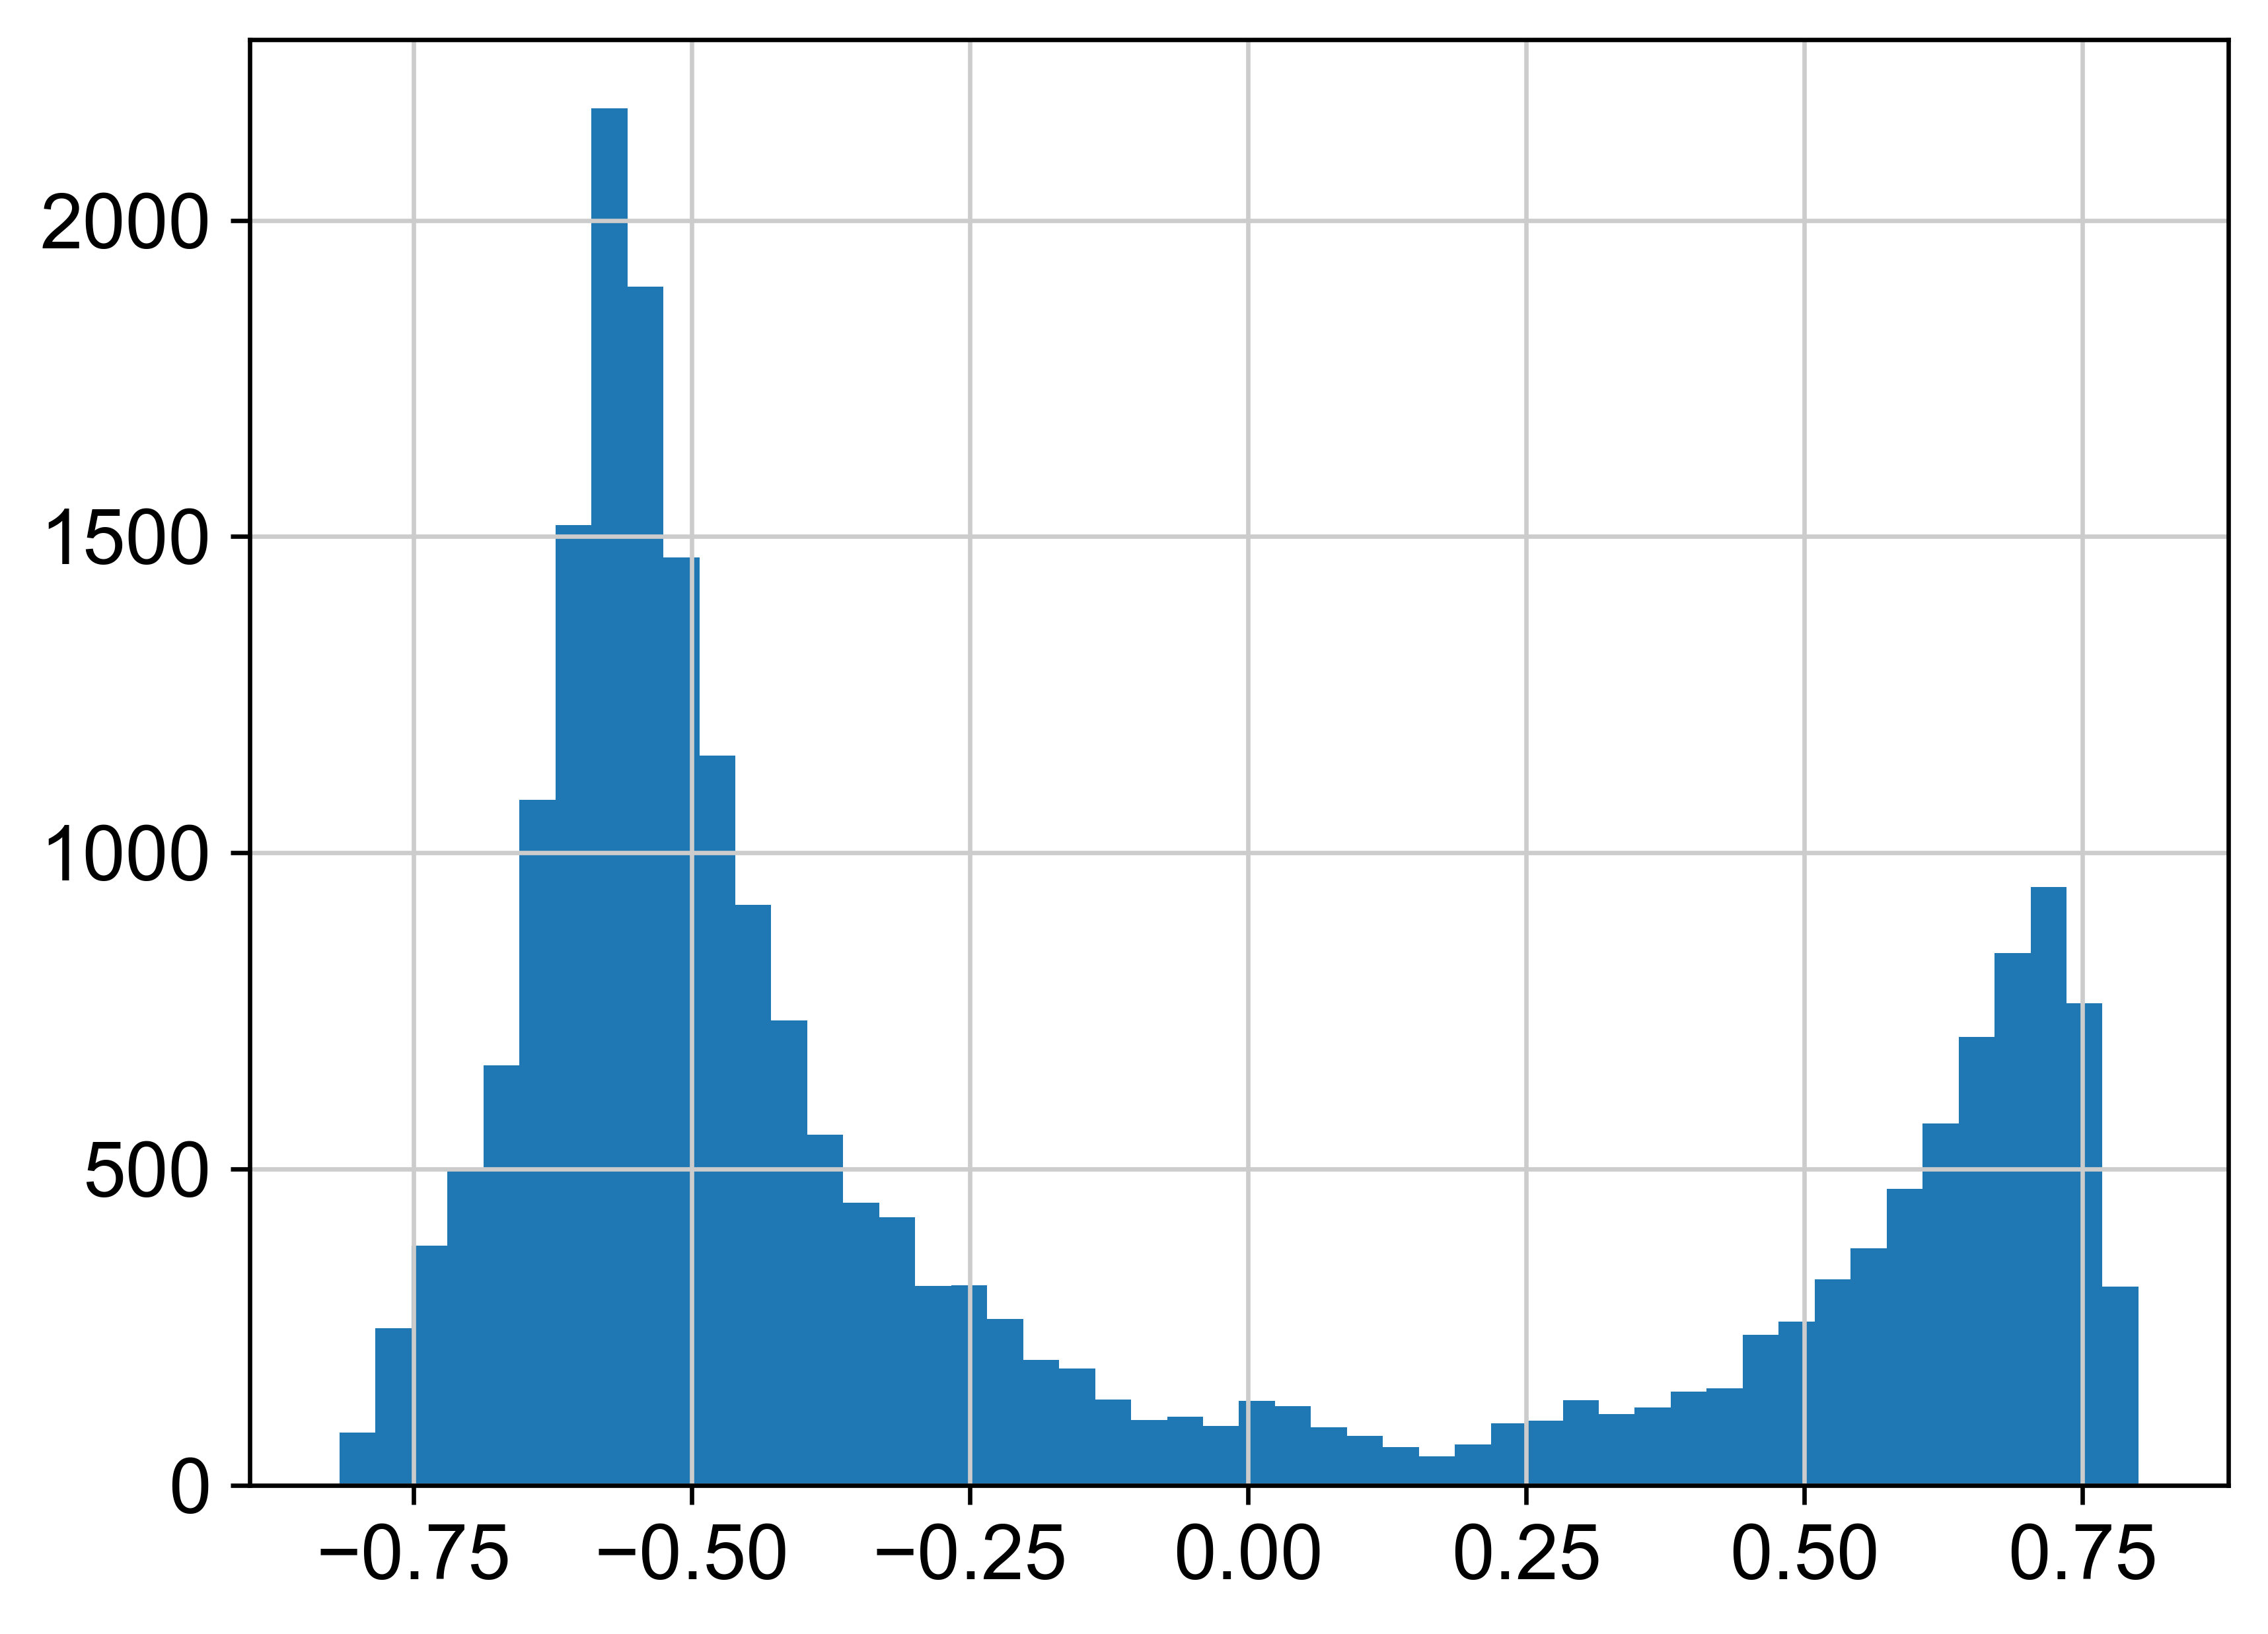

In [8]:
import seaborn as sns
ct_order = ['Capsular','Sub-Capsular','Cortical level 1','Cortical level 2','Cortical level 3','Cortical CMJ','Medullar CMJ','Medullar level 1','Medullar level 2','Medullar level 3']
ct_color_map = dict(zip(ct_order, np.array(sns.color_palette("tab20", len(ct_order)))[range(len(ct_order))]))
ct2_values = [-0.75,-0.62,-0.55,-0.45,-0.3,0.1,0.55,0.65,0.7]
adata_paed_cma.obs = ims.bin_axis(ct_order ,ct2_values,adata_paed_cma.obs,'cma_v2')   
adata_paed_cma.obs.loc[adata_paed_cma.obs['annotations_level_0']=='Edge','manual_bin_cma_v2'] = 'Capsular'
adata_paed_cma.obs['manual_bin_cma_v2'] = adata_paed_cma.obs['manual_bin_cma_v2'].cat.reorder_categories(ct_order)
adata_paed_cma.obs['manual_bin_cma_v2'].value_counts()
adata_paed_cma.obs['cma_v2'].hist(bins=50)
plt.show()

In [9]:
# Create matrix plot using scanpy
# output folder 
os.chdir('')
# os.getcwd()
gene_order = np.load('').tolist()

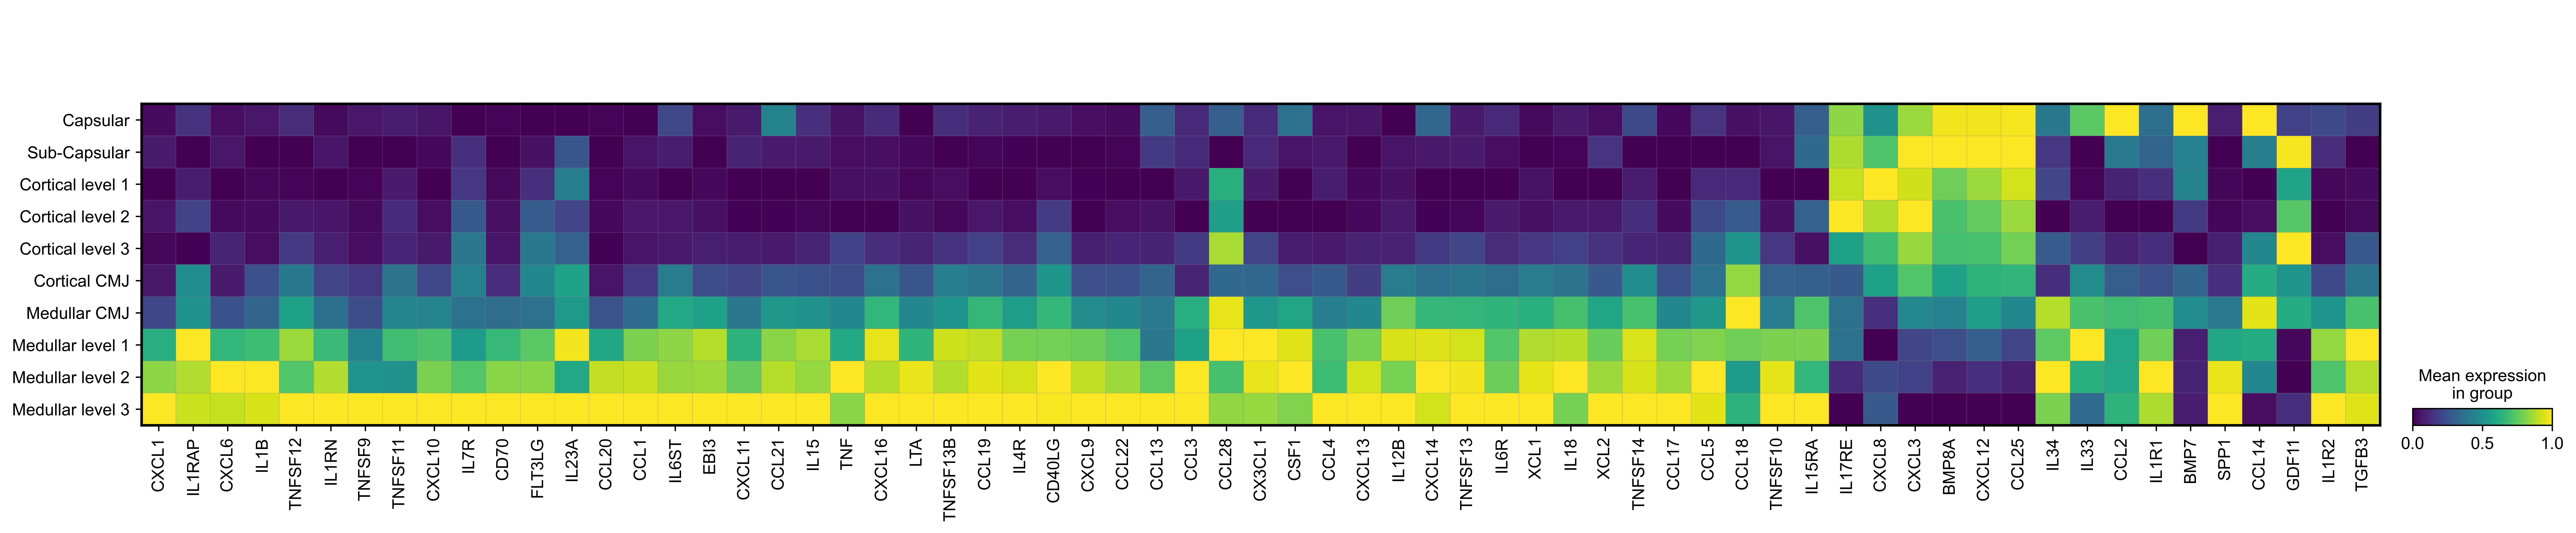

In [10]:
# Create matrix plot using scanpy and return the figure object
cyt_mtx_plot = sc.pl.matrixplot(
    adata_paed_cma,
    var_names=gene_order,
    groupby='manual_bin_cma_v2',
    cmap='viridis',
    standard_scale='var',
    dendrogram=False,
    return_fig=True
)

# Save the plot manually using savefig
cyt_mtx_plot.savefig('')

In [11]:
with pd.ExcelWriter(f'{source_folder}/Paed_cytokine_mtx.xlsx', engine='openpyxl') as writer:
        # Write the first title
        cyt_mtx_plot.values_df.to_excel(writer, index=True, header=True, startrow=0, sheet_name='Sheet1')
#         print (f'{source_folder}/Paed_cytokine_mtx.xlsx has been written')

# Analyse cell level

In [12]:
celltypes = adata_paed_cma.uns['mod']['factor_names']
cellab_paed = sc.AnnData(adata_paed_cma.obs[celltypes], 
                         obs = adata_paed_cma.obs.drop(celltypes, axis = 1),obsm = adata_paed_cma.obsm)
cellab_paed.var_names
sc.pp.normalize_total(cellab_paed,target_sum=100)
os.chdir('')


Index(['B-memory', 'B-naive', 'B-plasma', 'DC1', 'DC2', 'EC-Art', 'EC-Art-ELN',
       'EC-Cap', 'EC-Lymphatic', 'EC-Ven', 'InterloFb', 'Macrophage-APOC2',
       'Macrophage-SPIC1', 'Monocyte_IL1B', 'Myelocyte', 'Neutrophil',
       'Pericyte', 'Pericyte_CCL19', 'Pericyte_COL1A1', 'PeriloFb', 'SMC',
       'TEC-cilliated', 'TEC-myo', 'TEC-neuro', 'T_CD4', 'T_CD8',
       'T_CD8_memory', 'T_CD8αα(I)', 'T_CD8αα(II)', 'T_CD8αα(entry)',
       'T_DN(P)', 'T_DN(Q)', 'T_DN(early)', 'T_DP(P)', 'T_DP(Q)',
       'T_DP(Q)-CD99', 'T_DP(Q)-early', 'T_DP(Q)-late_vdj', 'T_ETP', 'T_NK',
       'T_Treg(agonist)', 'T_Treg-diff_1', 'T_Treg-diff_2', 'T_Treg_CD8',
       'T_Treg_mature', 'T_Treg_recirc', 'T_αβT(entry)', 'T_γδT', 'aDC1',
       'aDC2', 'aDC3', 'cTECI', 'cTECII', 'cTECIII', 'mTECI', 'mTECI-trans',
       'mTECII', 'mTECIII', 'mcTEC', 'medFB-MHCIIh', 'medFb', 'medFb-RGS5',
       'pDC'],
      dtype='object')

In [13]:
cells = {'CD8aa': [ 'T_CD8αα(entry)','T_CD8αα(I)', 'T_CD8αα(II)'],
         'DP_other':['T_DP(Q)-CD99', 'T_DP(Q)-late_vdj'],
         'SP':['T_CD4', 'T_CD8','T_CD8_memory','T_αβT(entry)'],
         'Treg':['T_Treg(agonist)', 'T_Treg-diff_1', 'T_Treg-diff_2','T_Treg_mature','T_Treg_CD8', 'T_Treg_recirc',],
         'DN':['T_ETP', 'T_DN(early)', 'T_DN(P)', 'T_DN(Q)'],
         'innate_and_memory':[ 'T_γδT','T_NK','T_CD8_memory'],
         'B': ['B-memory', 'B-naive', 'B-plasma'],
         'DC': ['DC1', 'DC2','aDC1','aDC2', 'aDC3','pDC'],
         'EC': ['EC-Art', 'EC-Art-ELN','EC-Cap','EC-Ven','EC-Lymphatic'],
         'FB':['PeriloFb','InterloFb', 'medFb', 'medFb-RGS5','medFB-MHCIIh'],
         'pericyte':['Pericyte','Pericyte_CCL19', 'Pericyte_COL1A1','SMC'],
         'TEC_special':['mTECI-trans','TEC-myo', 'TEC-neuro','TEC-cilliated', ],
         'MAC':['Macrophage-APOC2','Macrophage-SPIC1'],
         'Early':['T_ETP', 'T_DN(early)'],
         'TEC_fig4':['cTECIII','cTECII','cTECI','mcTEC',  'mTECI', 'mTECII', 'mTECIII',],
         'mono':['Monocyte_IL1B','Myelocyte', 'Neutrophil'],
         'T_traj':['T_DN(P)', 'T_DN(Q)','T_DP(P)','T_DP(Q)-early', 'T_DP(Q)','T_αβT(entry)', 'T_CD4', 'T_CD8'],
         'Extra_DP':['T_DP(Q)-CD99', 'T_DP(Q)-late_vdj']

        }

Early
['T_ETP', 'T_DN(early)']


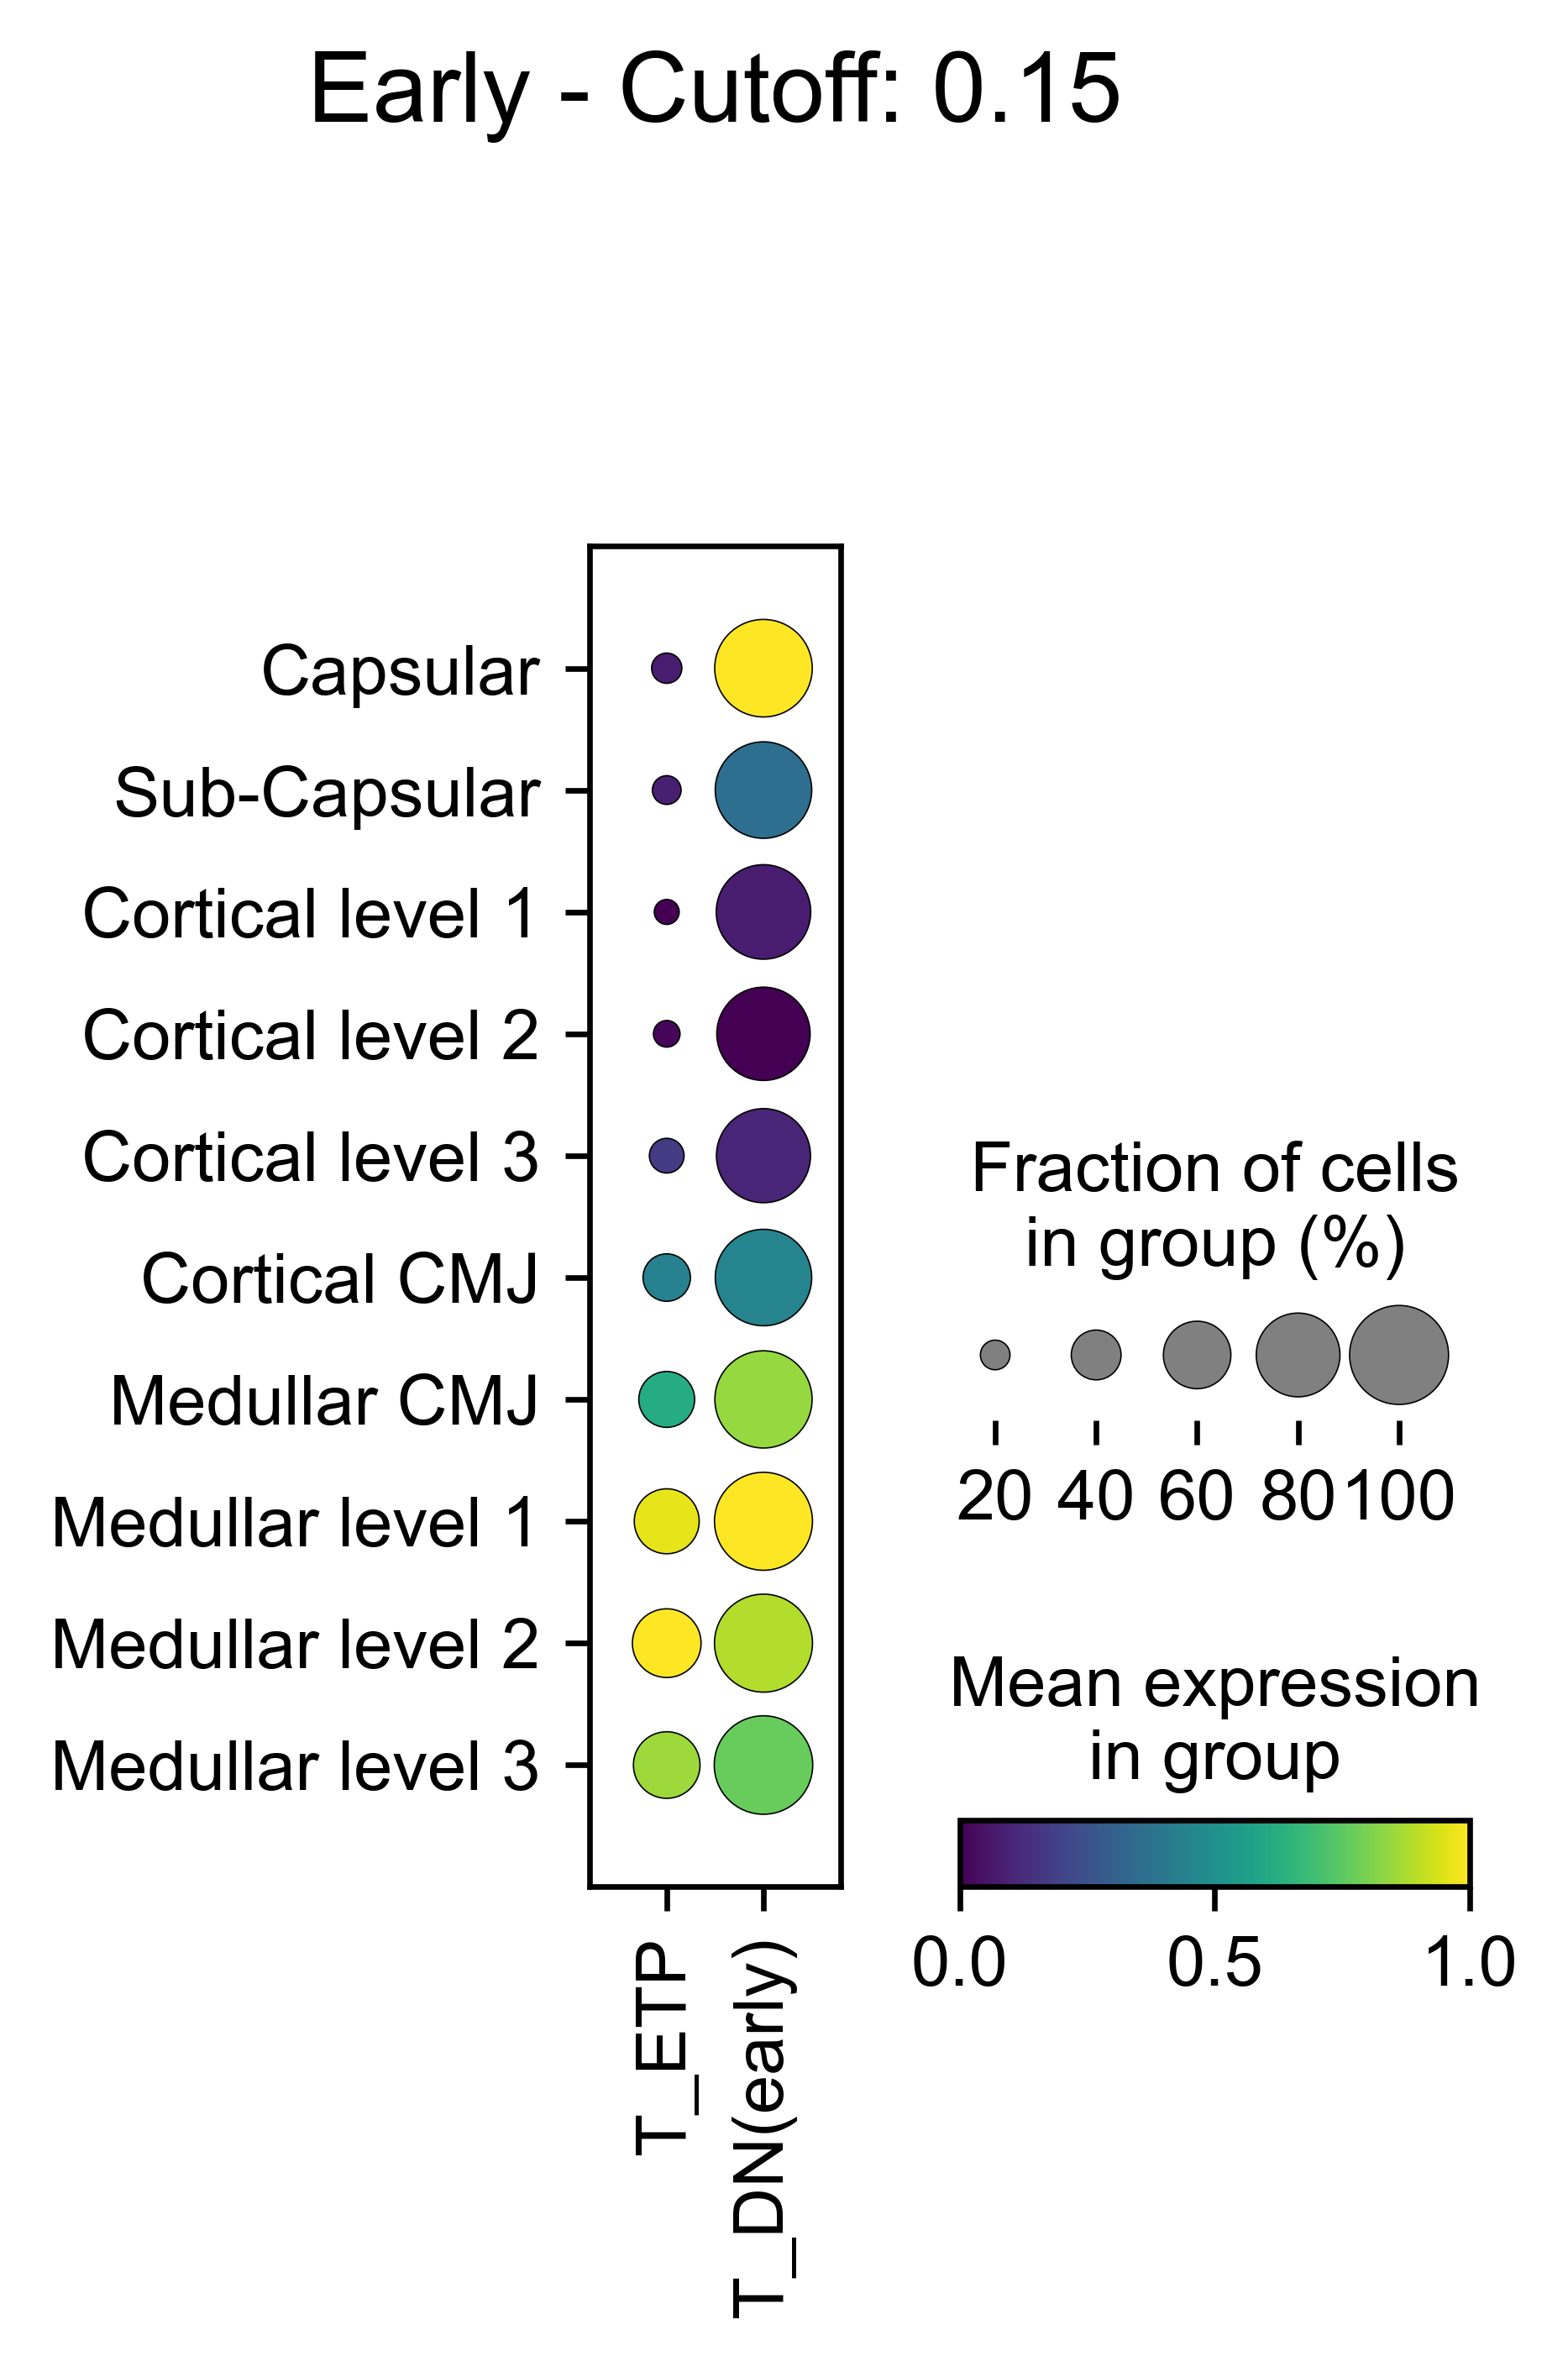

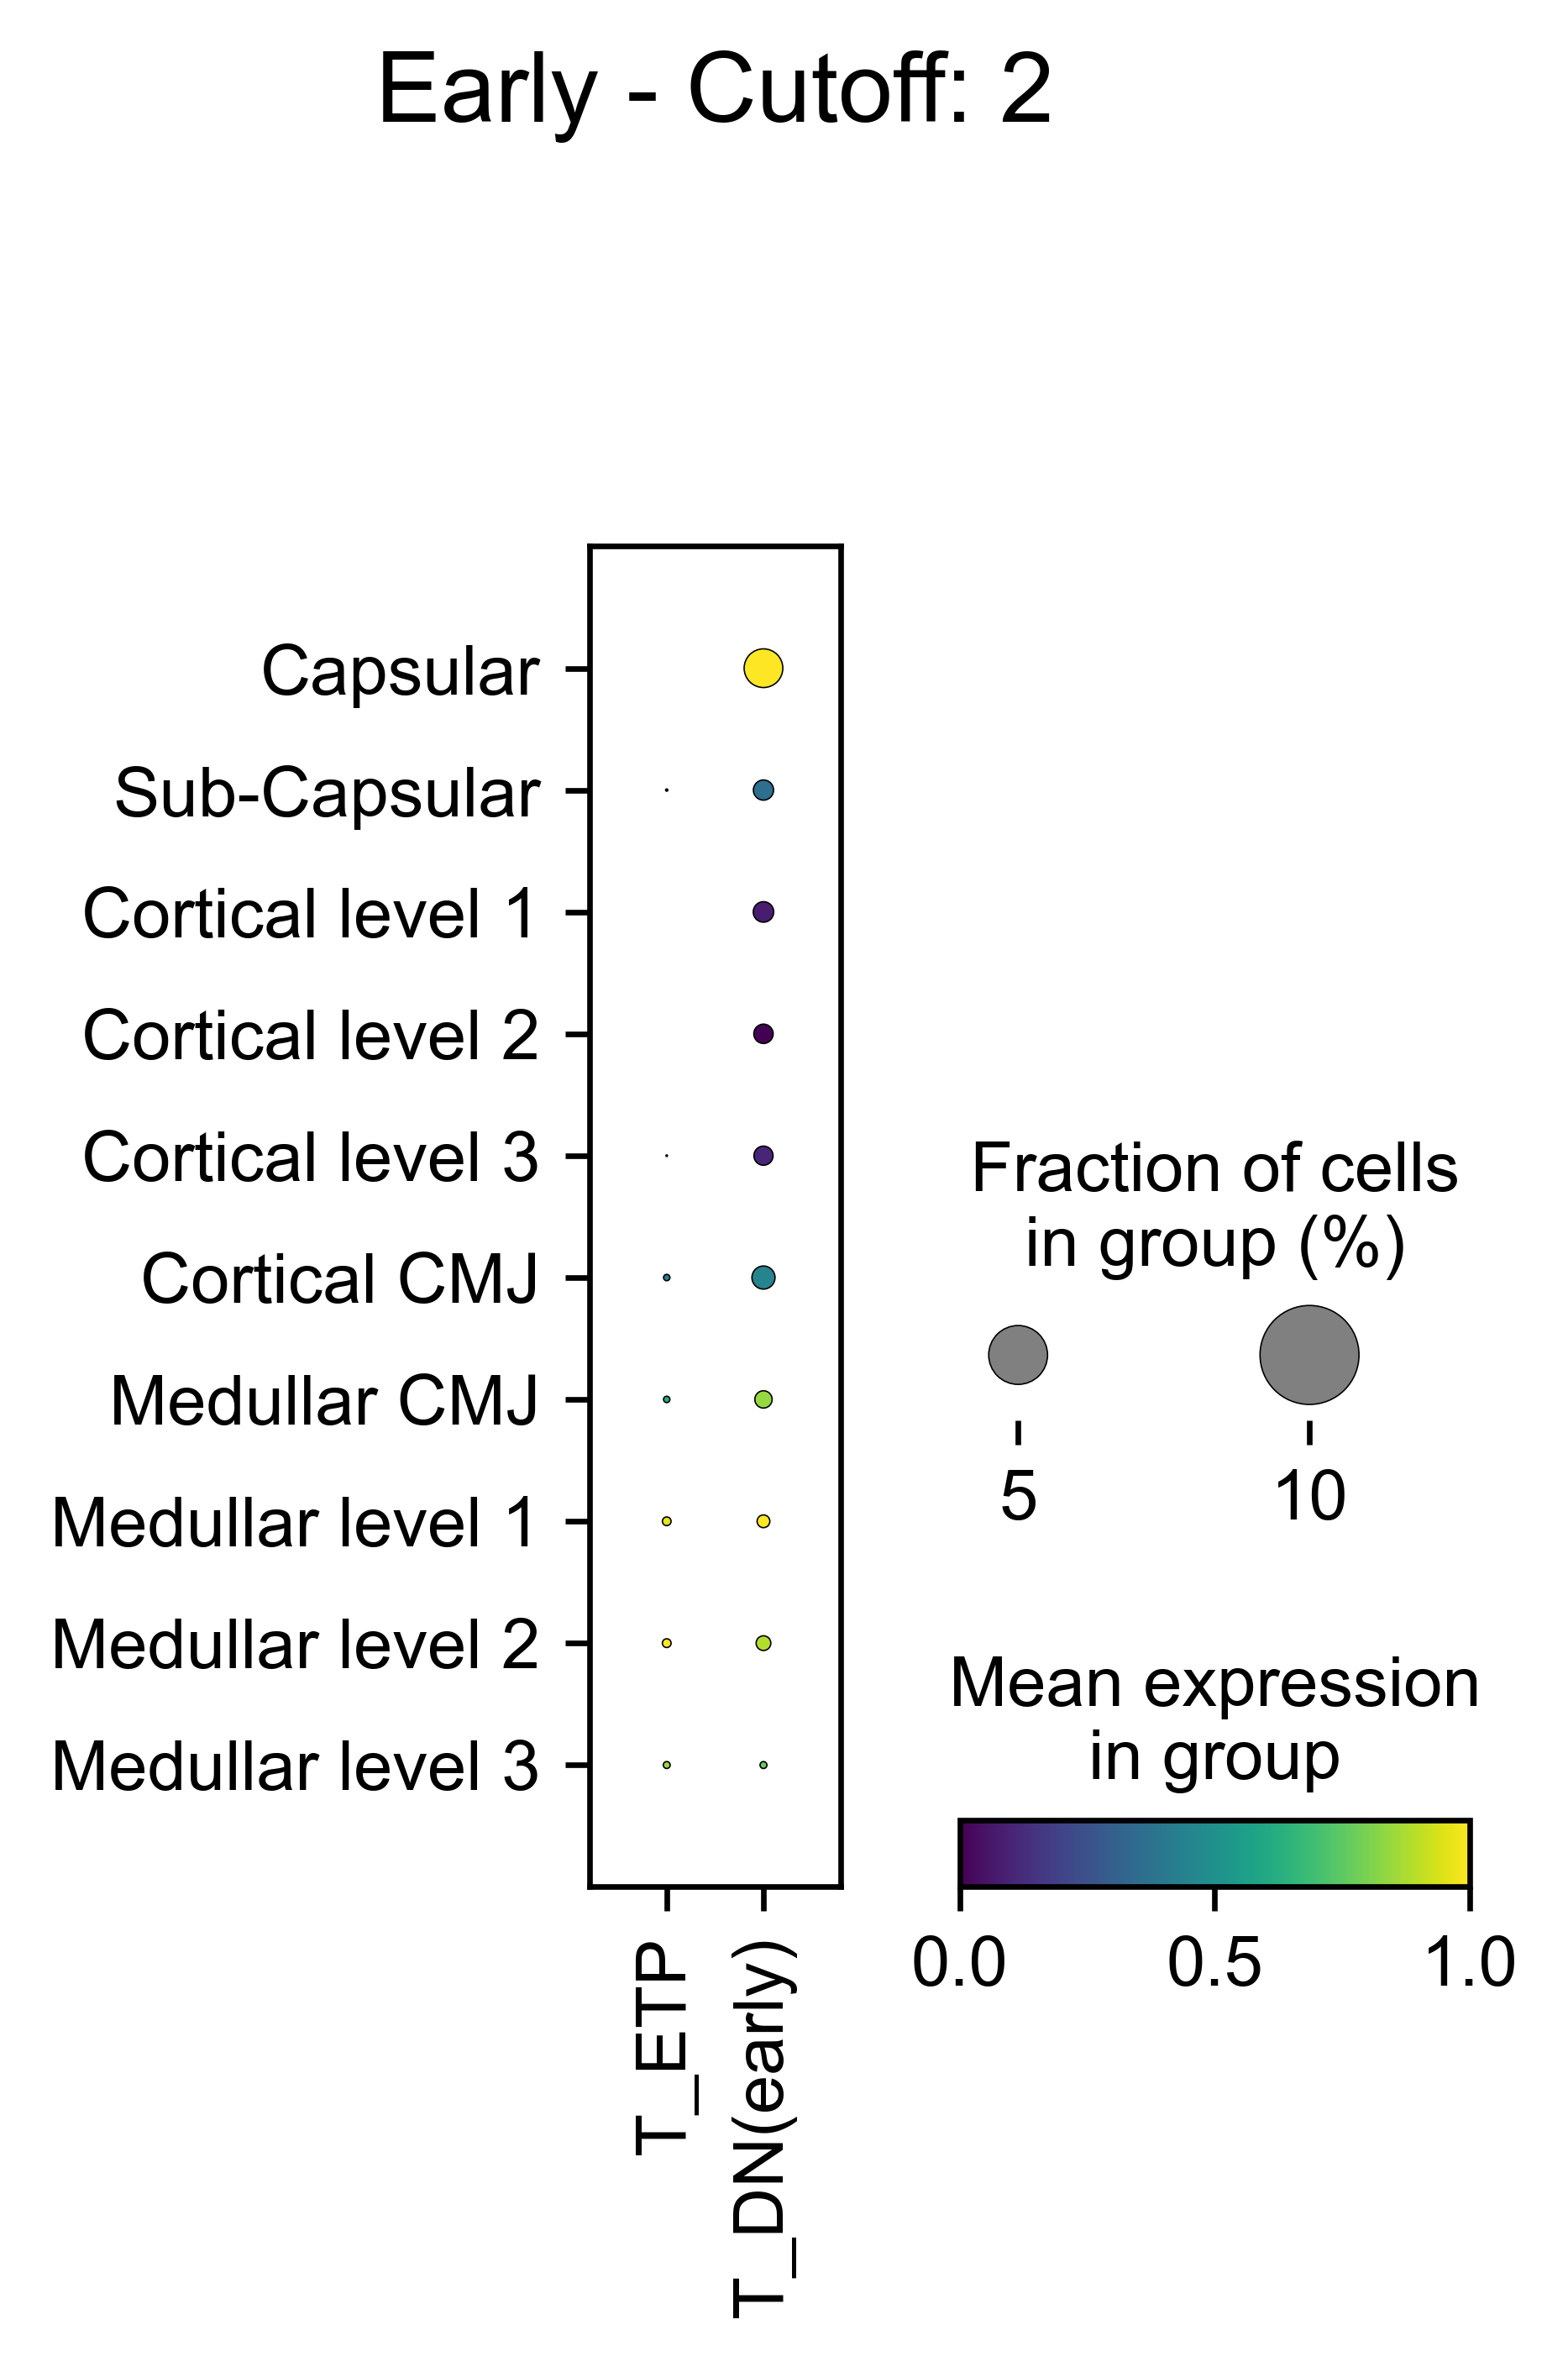

T_traj
['T_DN(P)', 'T_DN(Q)', 'T_DP(P)', 'T_DP(Q)-early', 'T_DP(Q)', 'T_αβT(entry)', 'T_CD4', 'T_CD8']


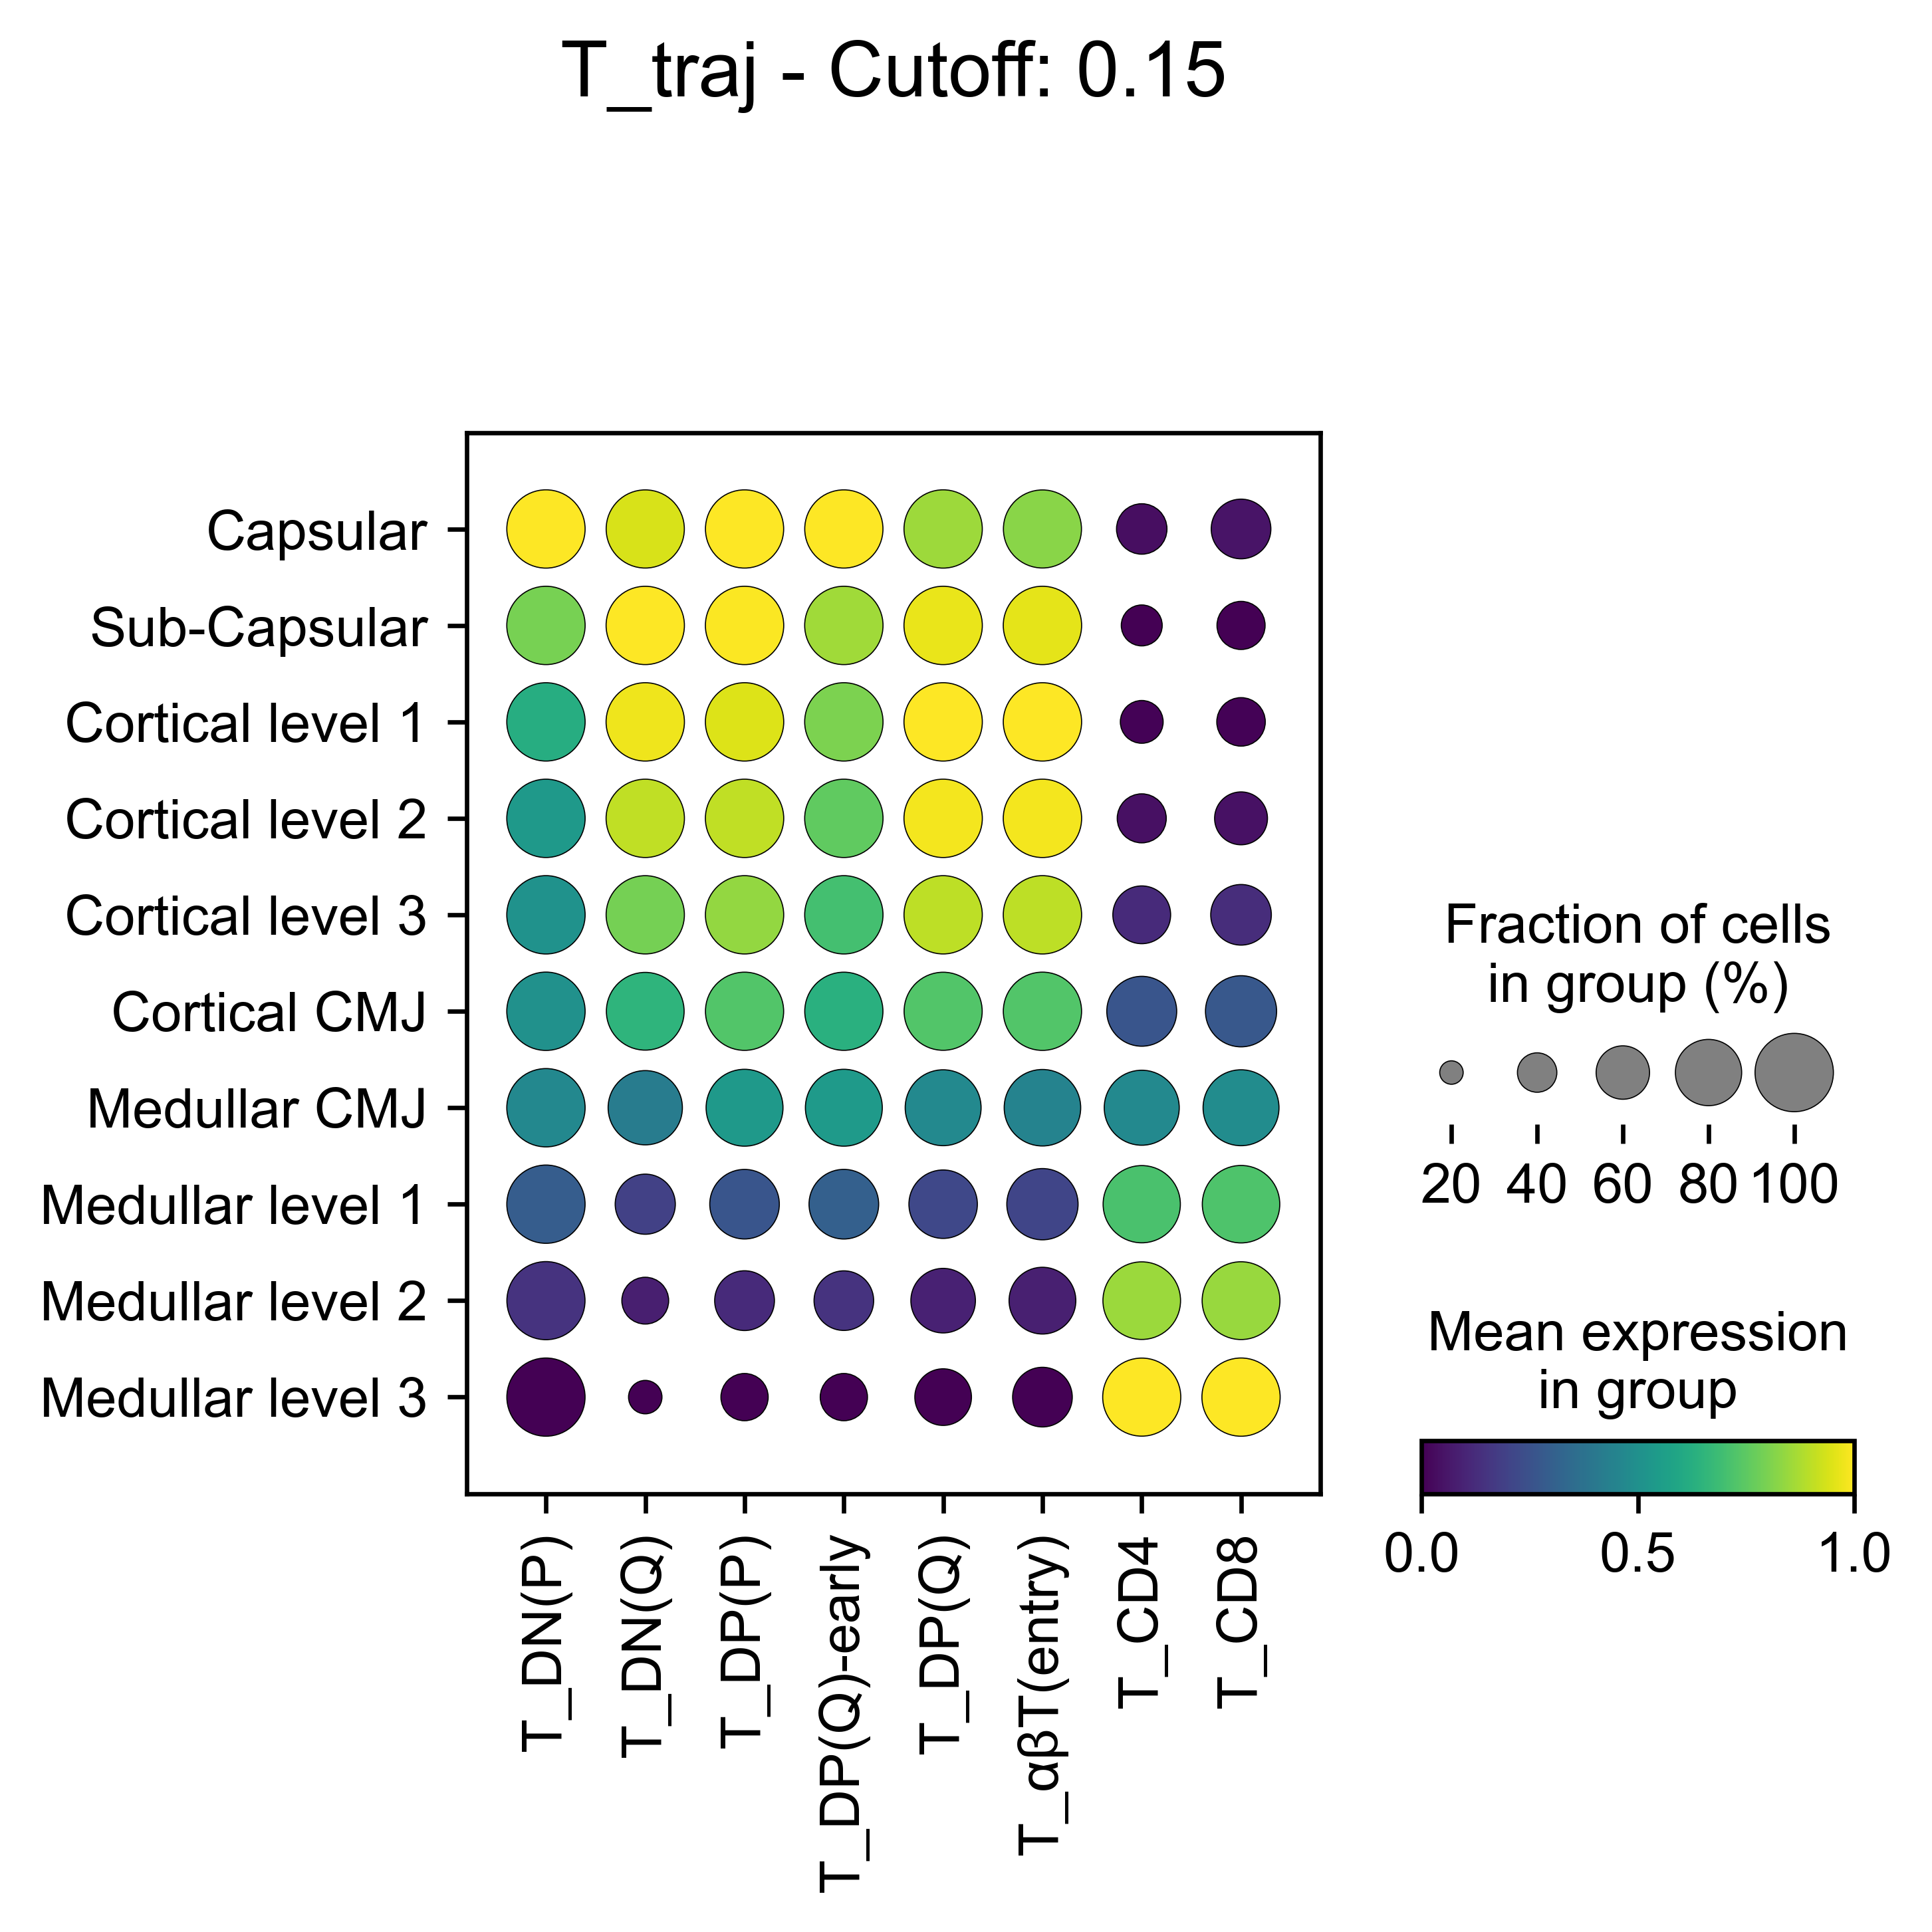

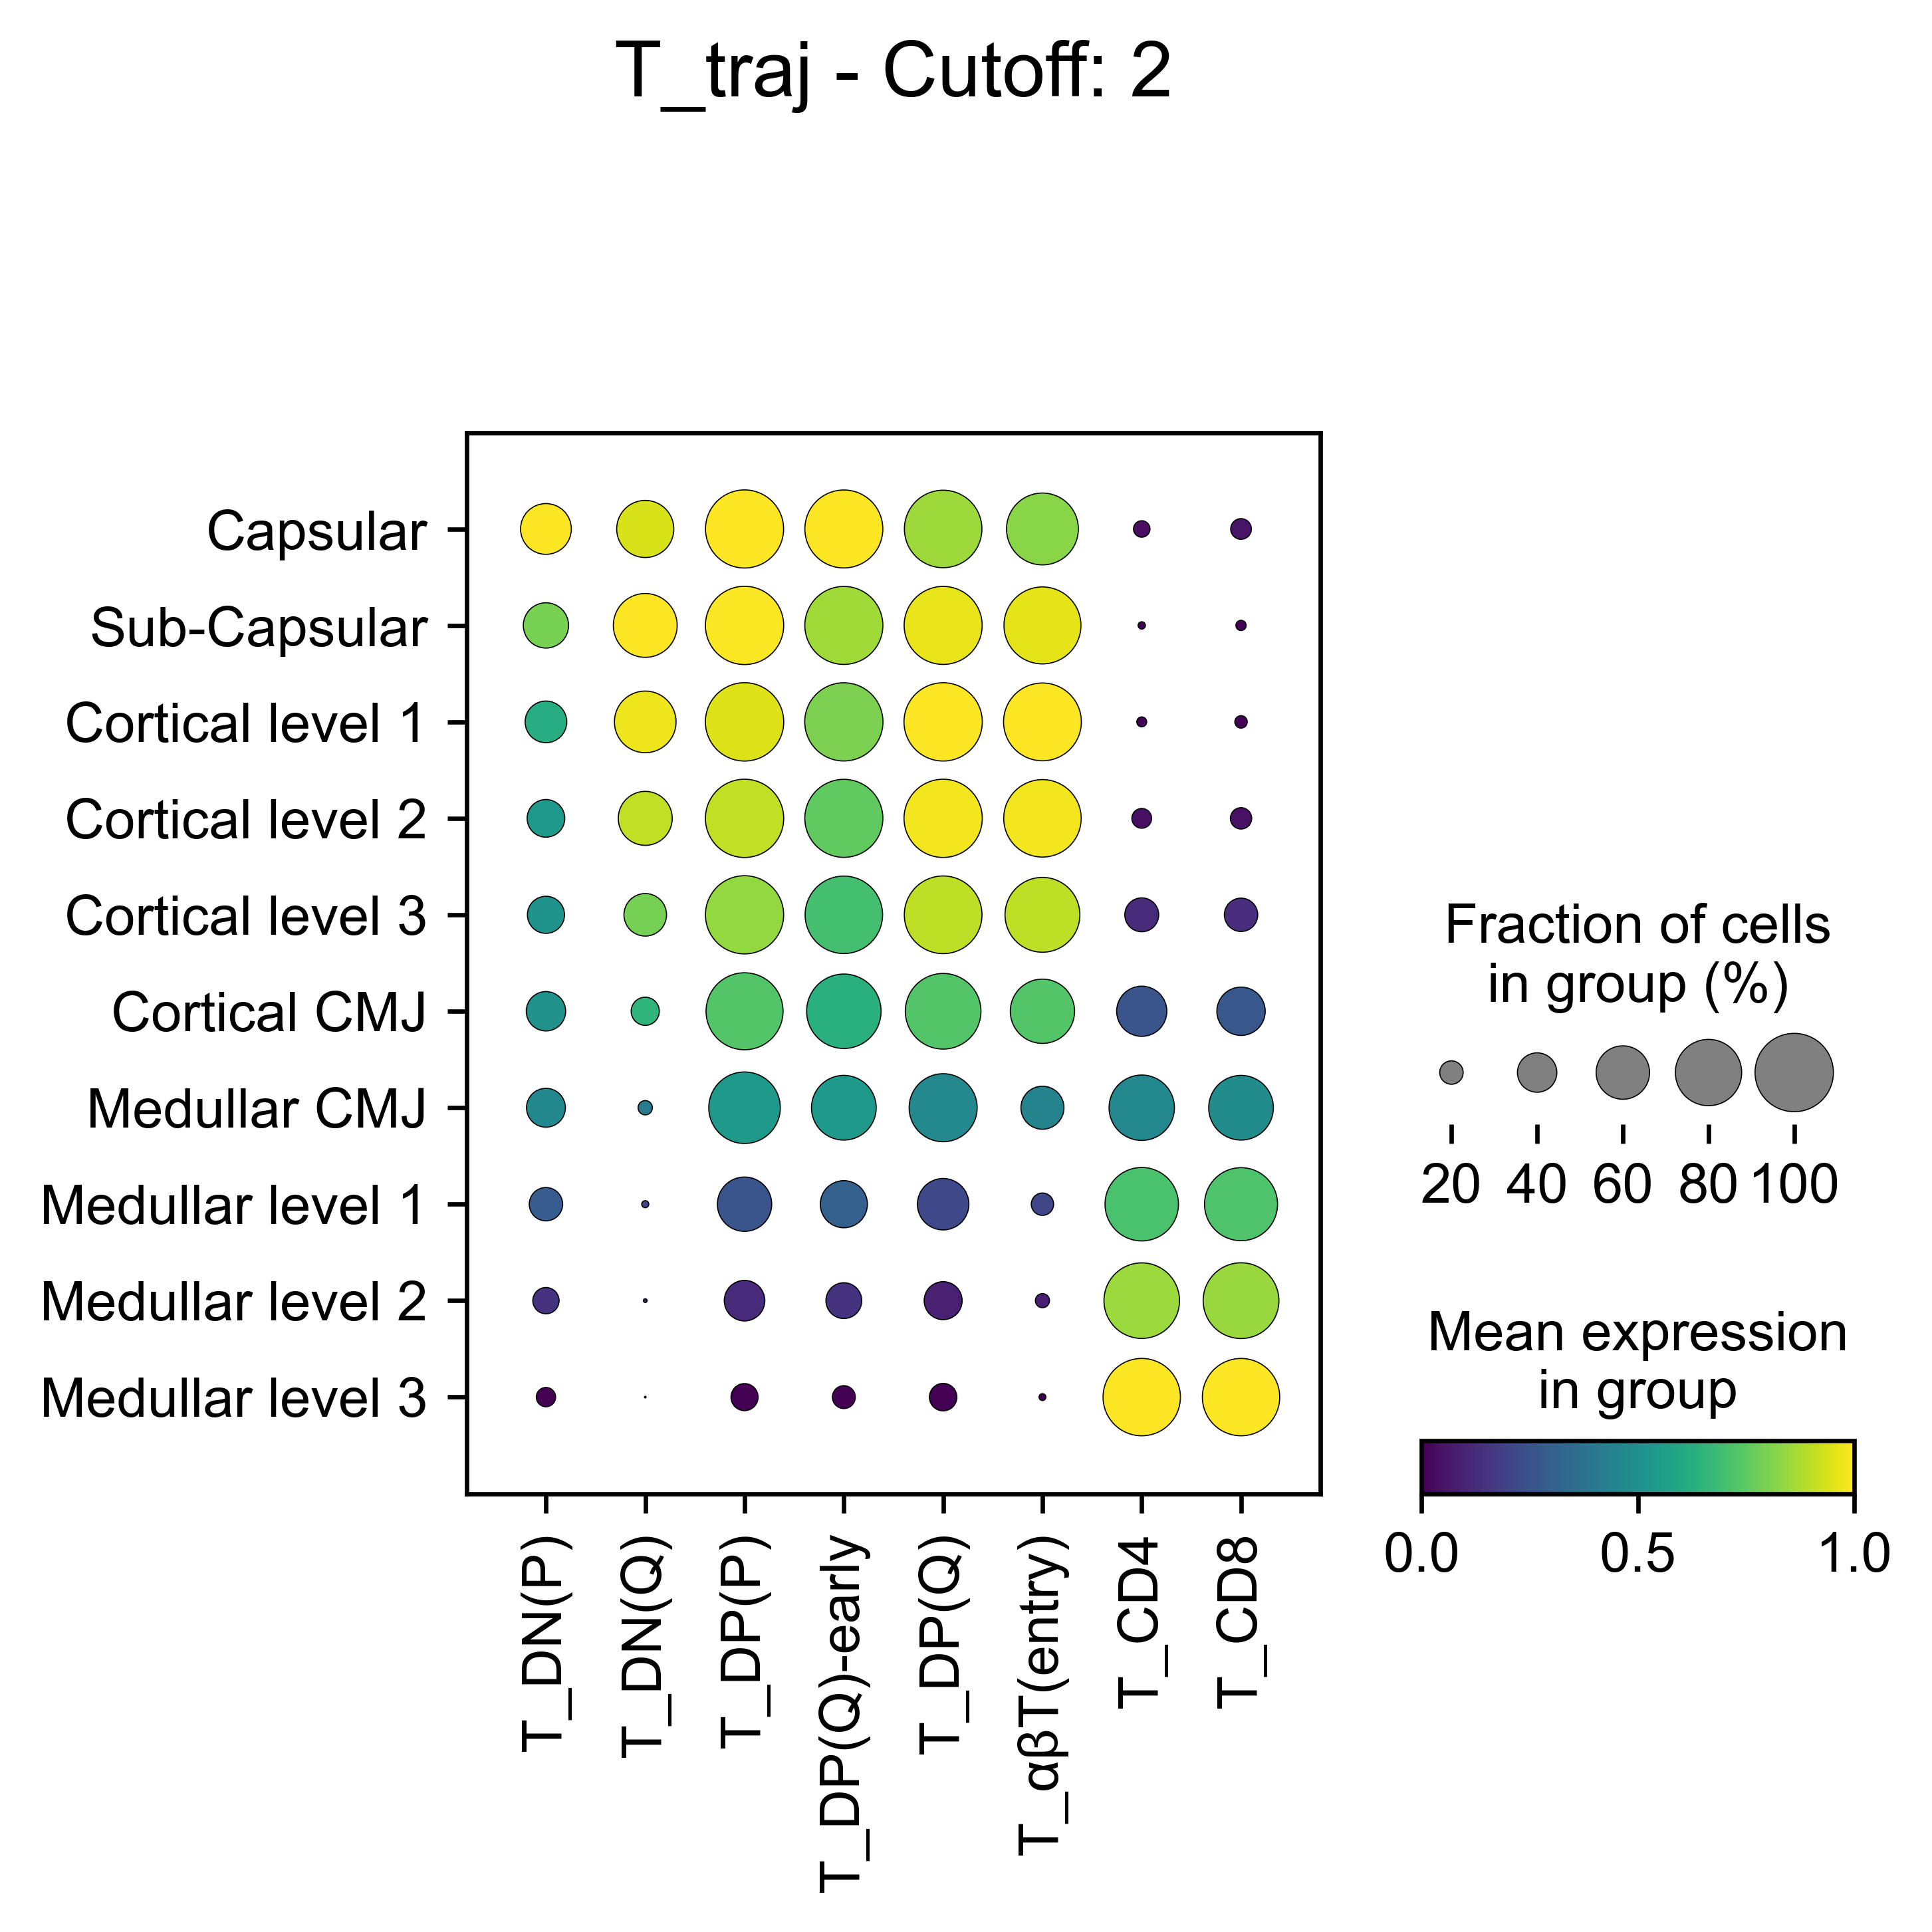

In [15]:
# subset cells
subset_keys = ['Early', 'T_traj']
cells_subset = {k: cells[k] for k in subset_keys}

for cell, cell_types in cells_subset.items():
    print(cell)
    print(cell_types)
    for cutoff in [0.15, 2]:
        save_path = None
#         save_path = f'paed_{cell}_cutoff_{cutoff}.pdf'  # Construct the file name
#         dp = sc.pl.dotplot(cellab_paed, var_names=cell_types,
#                       groupby='manual_bin_cma_v2', cmap='viridis',title=f'{cell} - Cutoff: {cutoff}',
#                       expression_cutoff=cutoff, standard_scale='var', return_fig = True, save=save_path)
#         export_Source_dotplot(Dotplot_obj = dp, path = source_folder, name = f"{cell}_{cutoff}_paed_Visdotplot_source_data")
#         dp.show()
#         dp.savefig(f'figures/{save_path}')
        sc.pl.dotplot(cellab_paed, var_names=cell_types,
                              groupby='manual_bin_cma_v2', cmap='viridis',title=f'{cell} - Cutoff: {cutoff}',
                              expression_cutoff=cutoff, standard_scale='var', save=save_path)

# plot other cells for the supp 

Treg
['T_Treg(agonist)', 'T_Treg-diff_1', 'T_Treg-diff_2', 'T_Treg_mature', 'T_Treg_CD8', 'T_Treg_recirc']
/nfs/team205/ny1/ThymusSpatialAtlas/SourceData/Treg_1_paed_Visdotplot_source_data.xlsx has been written


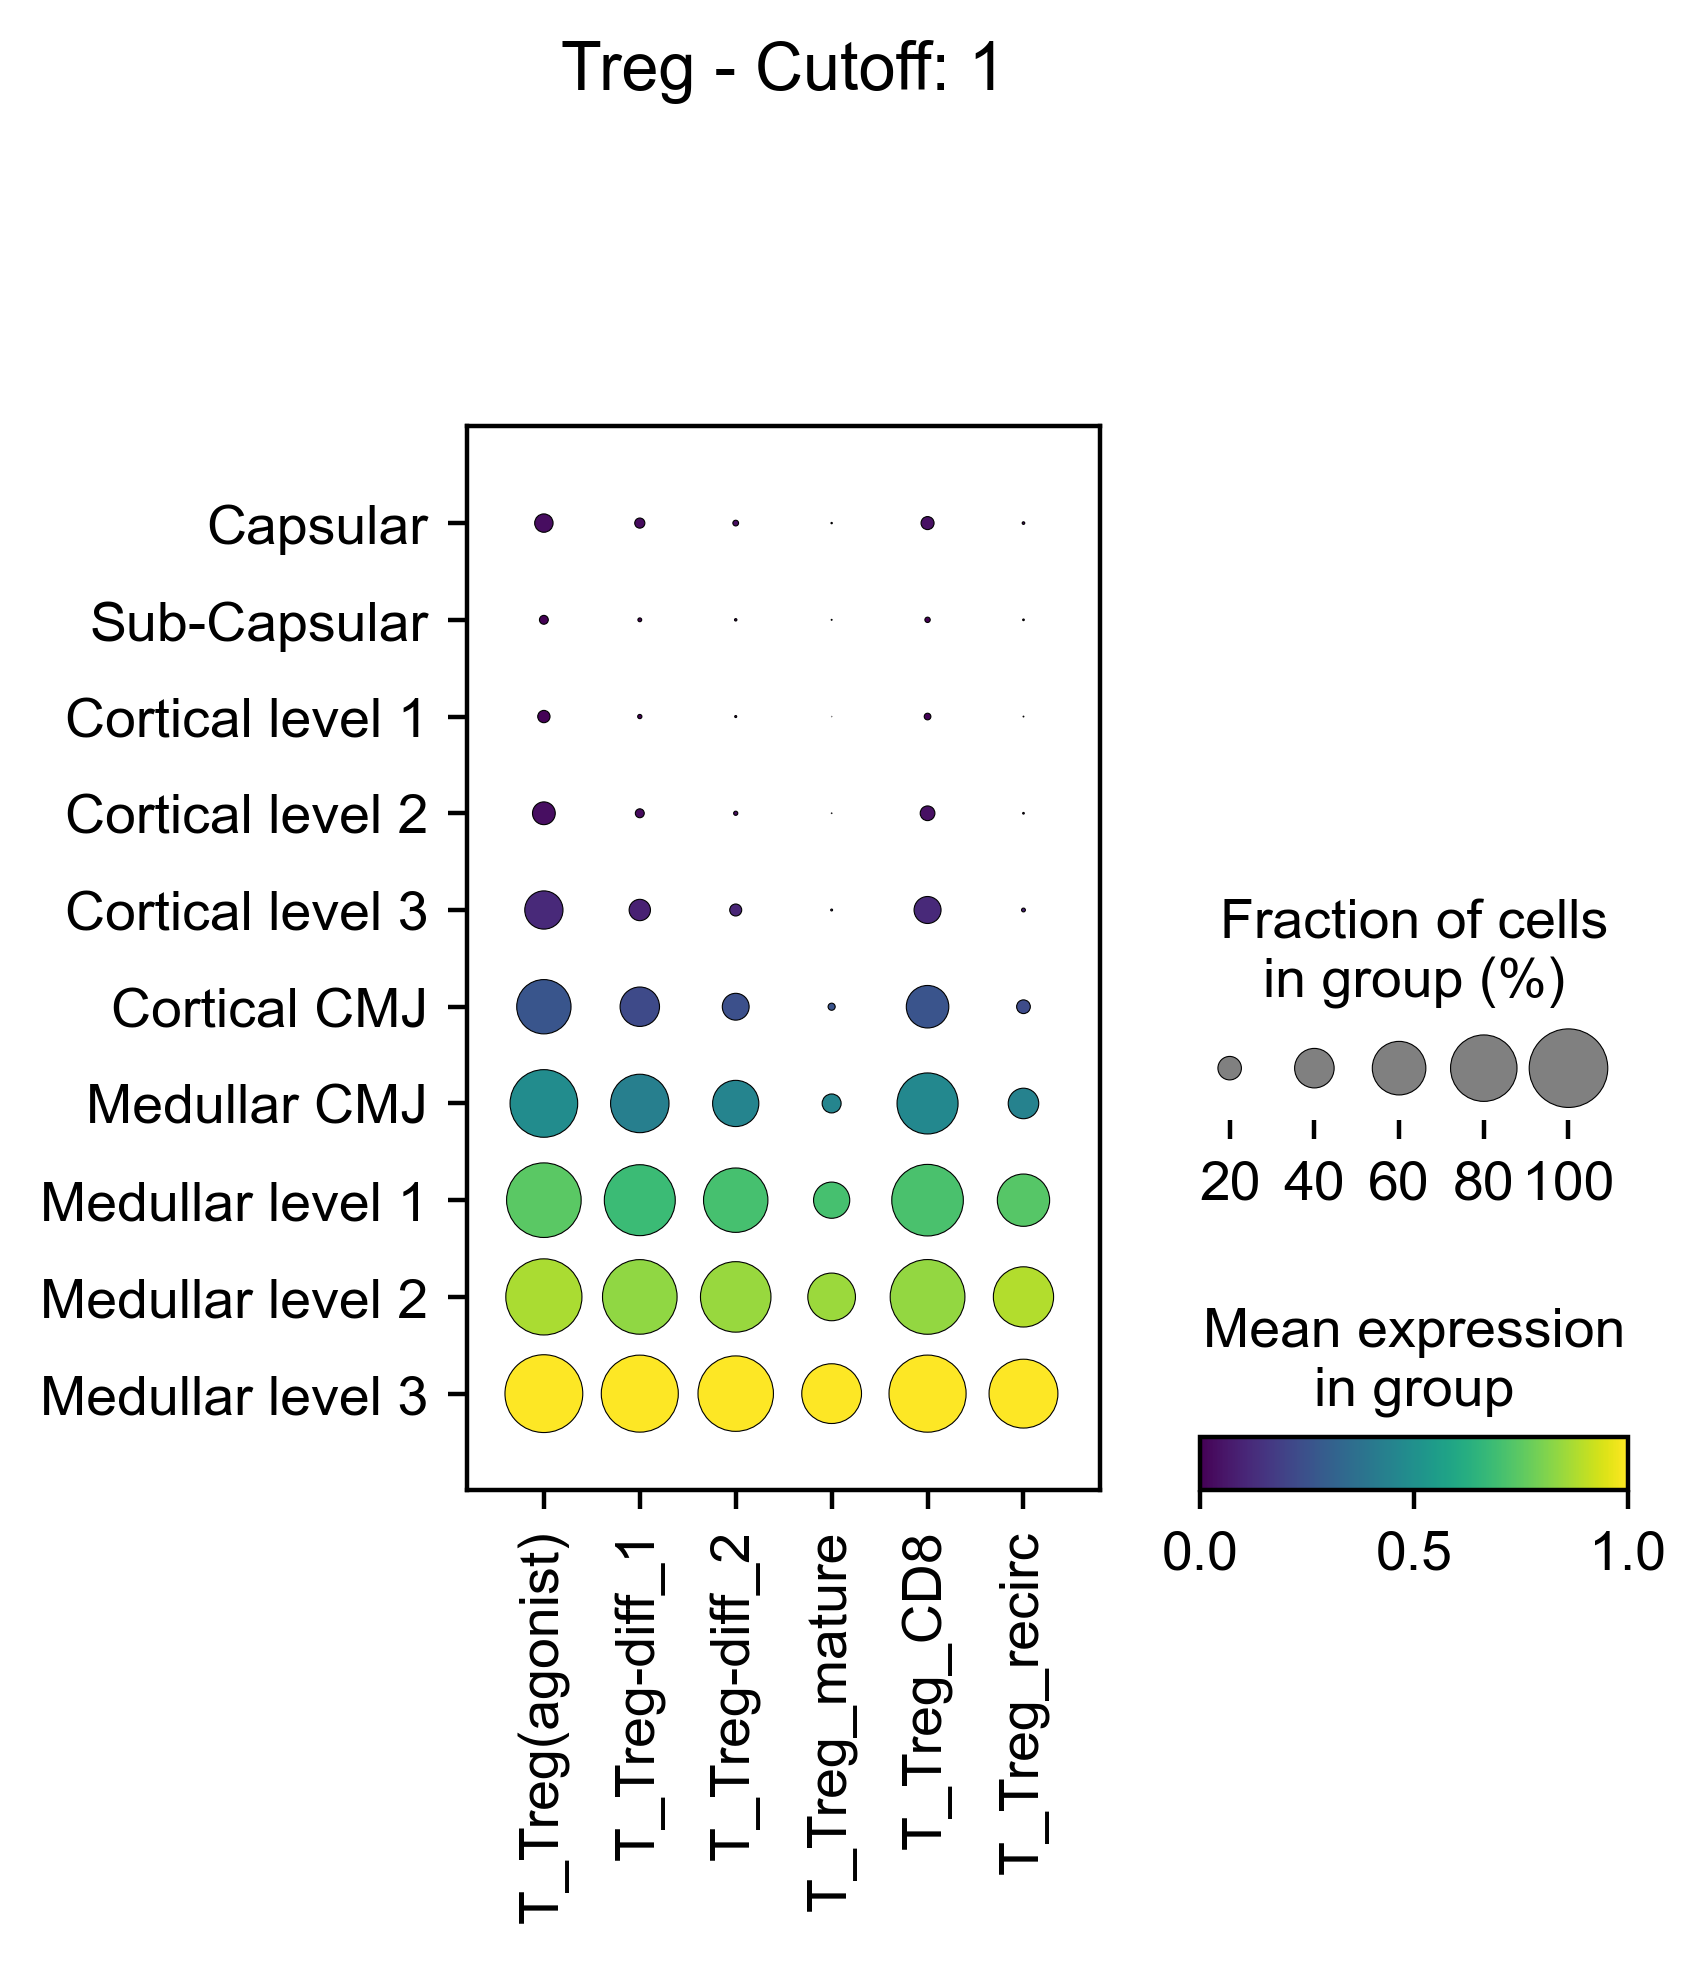

innate_and_memory
['T_γδT', 'T_NK', 'T_CD8_memory']
/nfs/team205/ny1/ThymusSpatialAtlas/SourceData/innate_and_memory_1_paed_Visdotplot_source_data.xlsx has been written


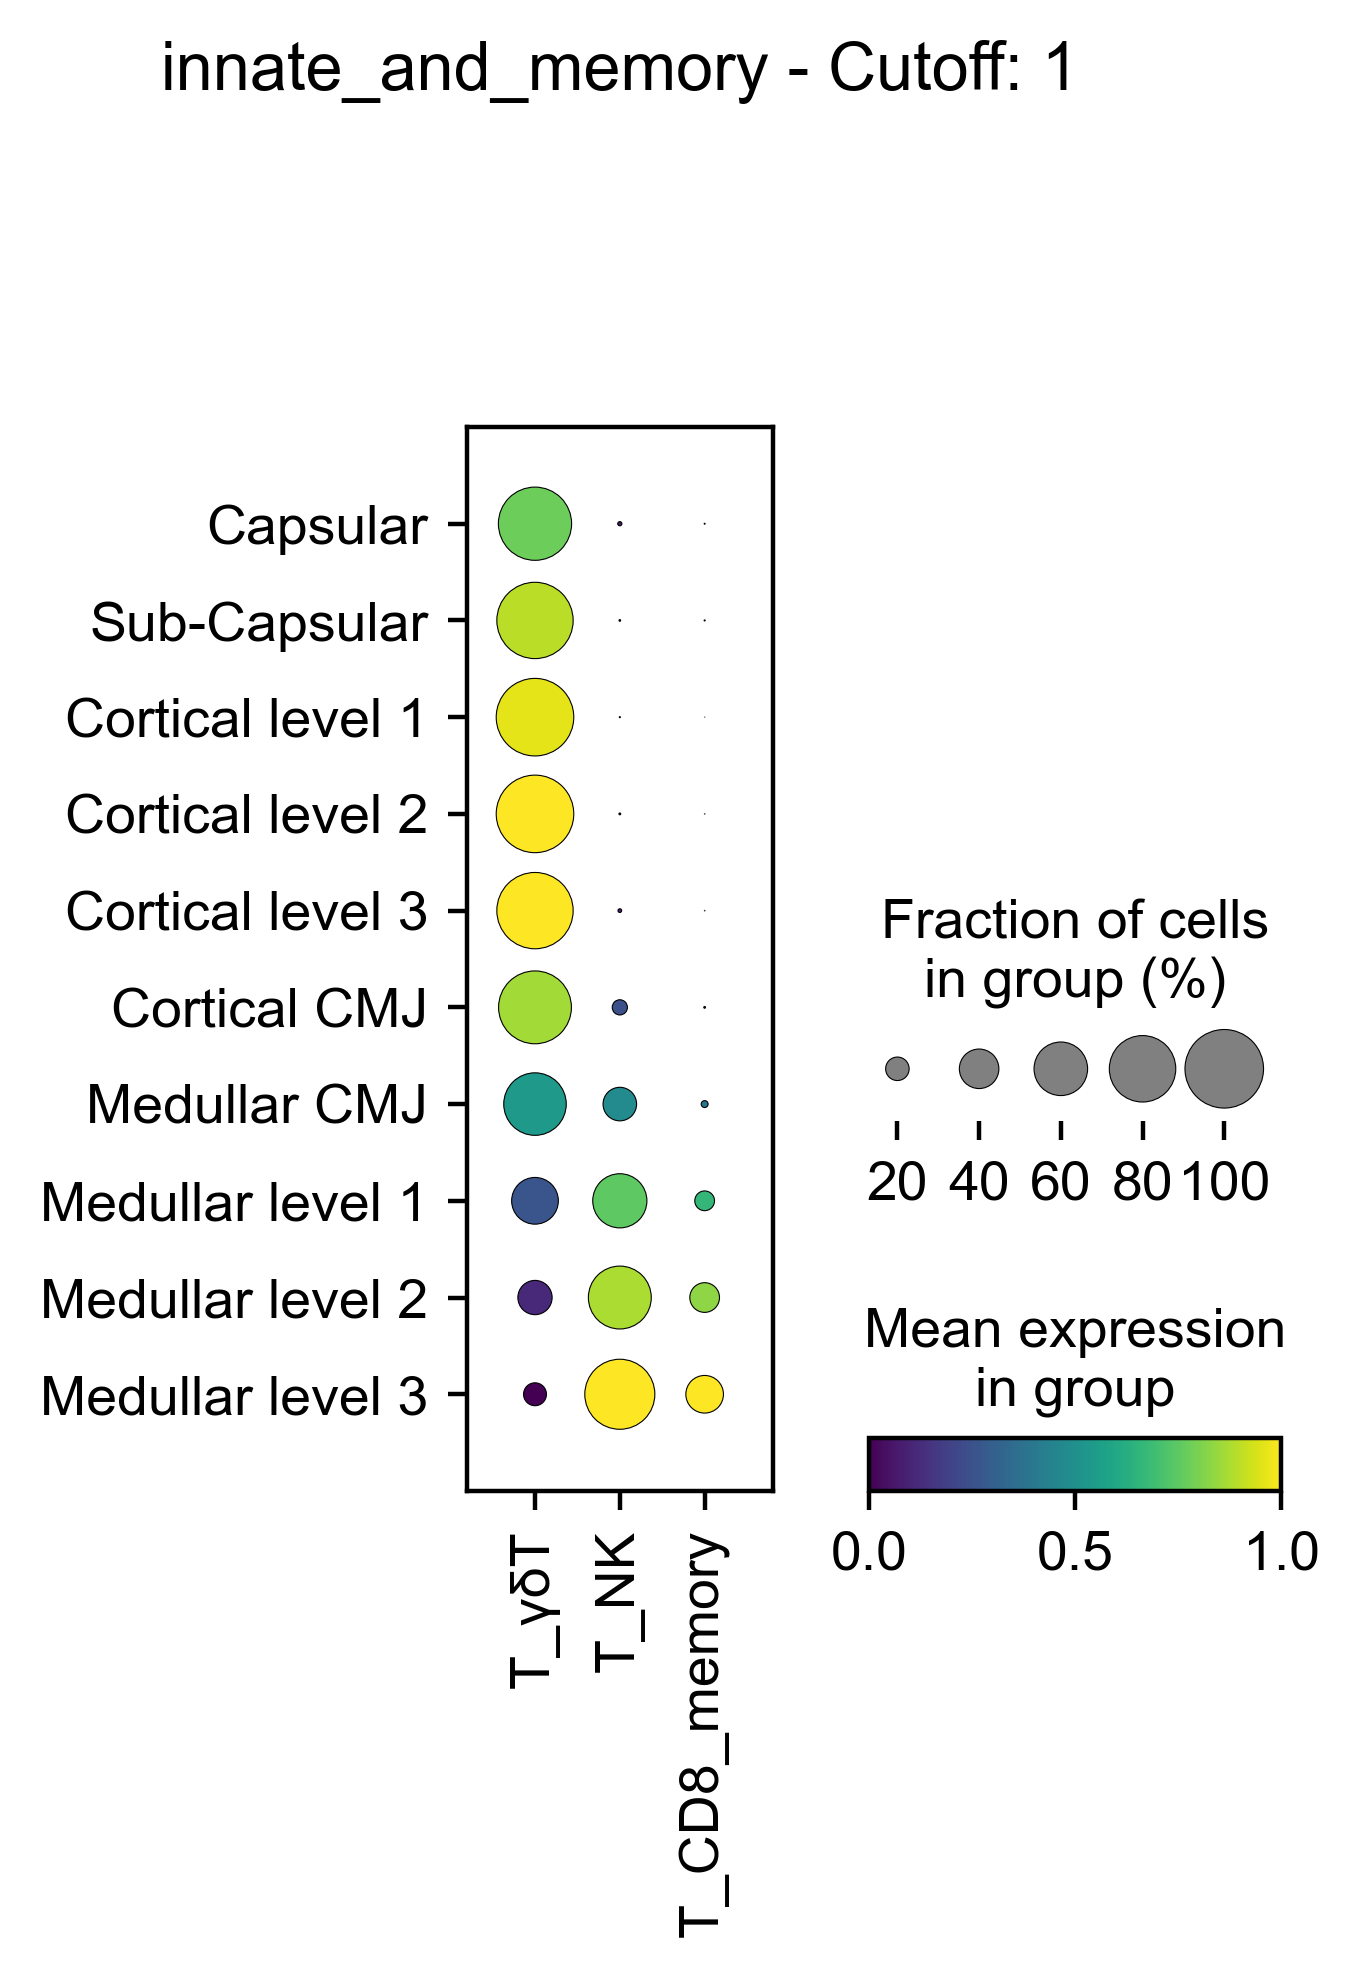

CD8aa
['T_CD8αα(entry)', 'T_CD8αα(I)', 'T_CD8αα(II)']
/nfs/team205/ny1/ThymusSpatialAtlas/SourceData/CD8aa_0.25_paed_Visdotplot_source_data.xlsx has been written


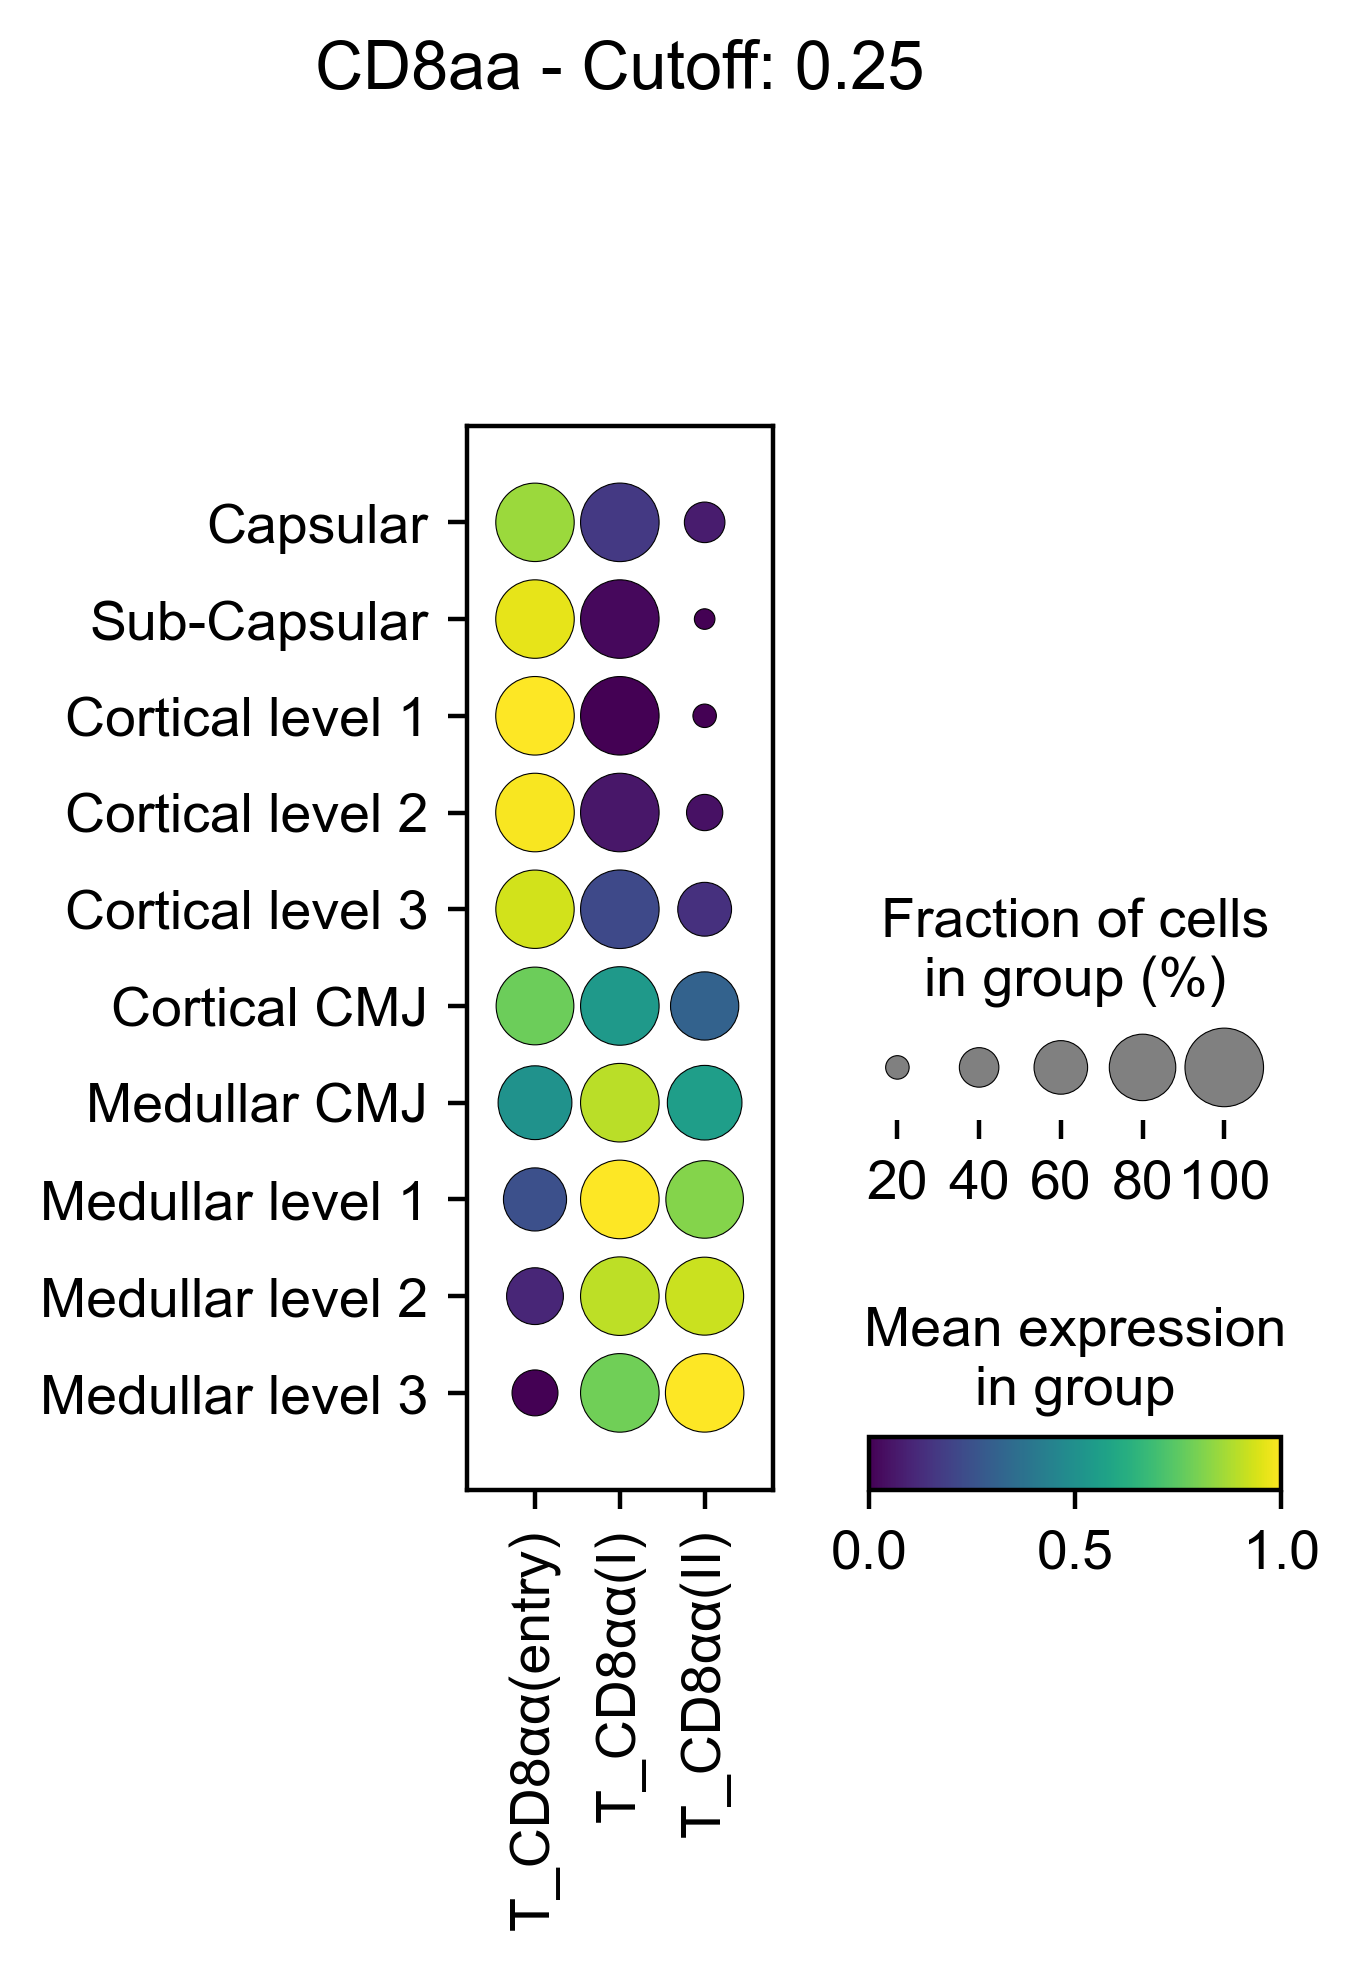

In [17]:
# subset cells supplemnetary T cells figure 
os.chdir('')

subset_keys = ['Treg','innate_and_memory','CD8aa']
cutoff = {'DP_other':10,'Treg':1,'innate_and_memory':1,'CD8aa':0.25}
cells_subset = {k: cells[k] for k in subset_keys}
 
sc.set_figure_params(figsize=[7, 7], fontsize=12, dpi=200)

for cell, cell_types in cells_subset.items():
    print(cell)
    print(cell_types)
    save_path = None
#     save_path = f'paed_{cell}_cutoff_{cutoff[cell]}.pdf'  # Construct the file name
    dp = sc.pl.dotplot(cellab_paed, var_names=cell_types,
              groupby='manual_bin_cma_v2', cmap='viridis',title=f'{cell} - Cutoff: {cutoff[cell]}',
                      expression_cutoff=cutoff[cell], standard_scale='var', return_fig = True)#save=save_path)
    export_Source_dotplot(Dotplot_obj = dp, path = source_folder, name = f"{cell}_{cutoff[cell]}_paed_Visdotplot_source_data")
    dp.show()
#     dp.savefig(f'figures/{save_path}')
    

In [18]:
# subset cells supplemnetary myloid figure 
os.chdir('')

subset_keys = ['DC','MAC','B','mono']
cutoff = {'DC':0.25,'MAC':0.25,'B':0.5,'mono':0.1}
cells_subset = {k: cells[k] for k in subset_keys}
 
sc.set_figure_params(figsize=[7, 7], fontsize=12, dpi=200)

for cell, cell_types in cells_subset.items():
    print(cell)
    print(cell_types)
    save_path = None
#     save_path = f'paed_{cell}_cutoff_{cutoff[cell]}.pdf'  # Construct the file name
    dp = sc.pl.dotplot(cellab_paed, var_names=cell_types,
              groupby='manual_bin_cma_v2', cmap='viridis',title=f'{cell} - Cutoff: {cutoff[cell]}',
                      expression_cutoff=cutoff[cell], standard_scale='var', return_fig = True, save=save_path)
    export_Source_dotplot(Dotplot_obj = dp, path = source_folder, name = f"{cell}_{cutoff[cell]}_paed_Visdotplot_source_data")
#     dp.show()
#     dp.savefig(f'figures/{save_path}')

In [16]:
# subset cells supplemnetary FB figure 
os.chdir('')

subset_keys = ['FB','EC','pericyte']
cutoff = {'FB':0.15,'EC':0.15,'pericyte':0.15}
cells_subset = {k: cells[k] for k in subset_keys}
 
sc.set_figure_params(figsize=[7, 7], fontsize=12, dpi=200)

for cell, cell_types in cells_subset.items():
    print(cell)
    print(cell_types)
    save_path = f'paed_{cell}_cutoff_{cutoff[cell]}.pdf'  # Construct the file name
    dp = sc.pl.dotplot(cellab_paed, var_names=cell_types,
              groupby='manual_bin_cma_v2', cmap='viridis',title=f'{cell} - Cutoff: {cutoff[cell]}',
                     expression_cutoff=cutoff[cell], standard_scale='var', return_fig = True) #save=save_path)
    export_Source_dotplot(Dotplot_obj = dp, path = source_folder, name = f"{cell}_{cutoff[cell]}_paed_Visdotplot_source_data")
#     dp.show()

TEC_special
['mTECI-trans', 'TEC-myo', 'TEC-neuro', 'TEC-cilliated']
/nfs/team205/ny1/ThymusSpatialAtlas/SourceData/TEC_special_0.25_paed_Visdotplot_source_data.xlsx has been written


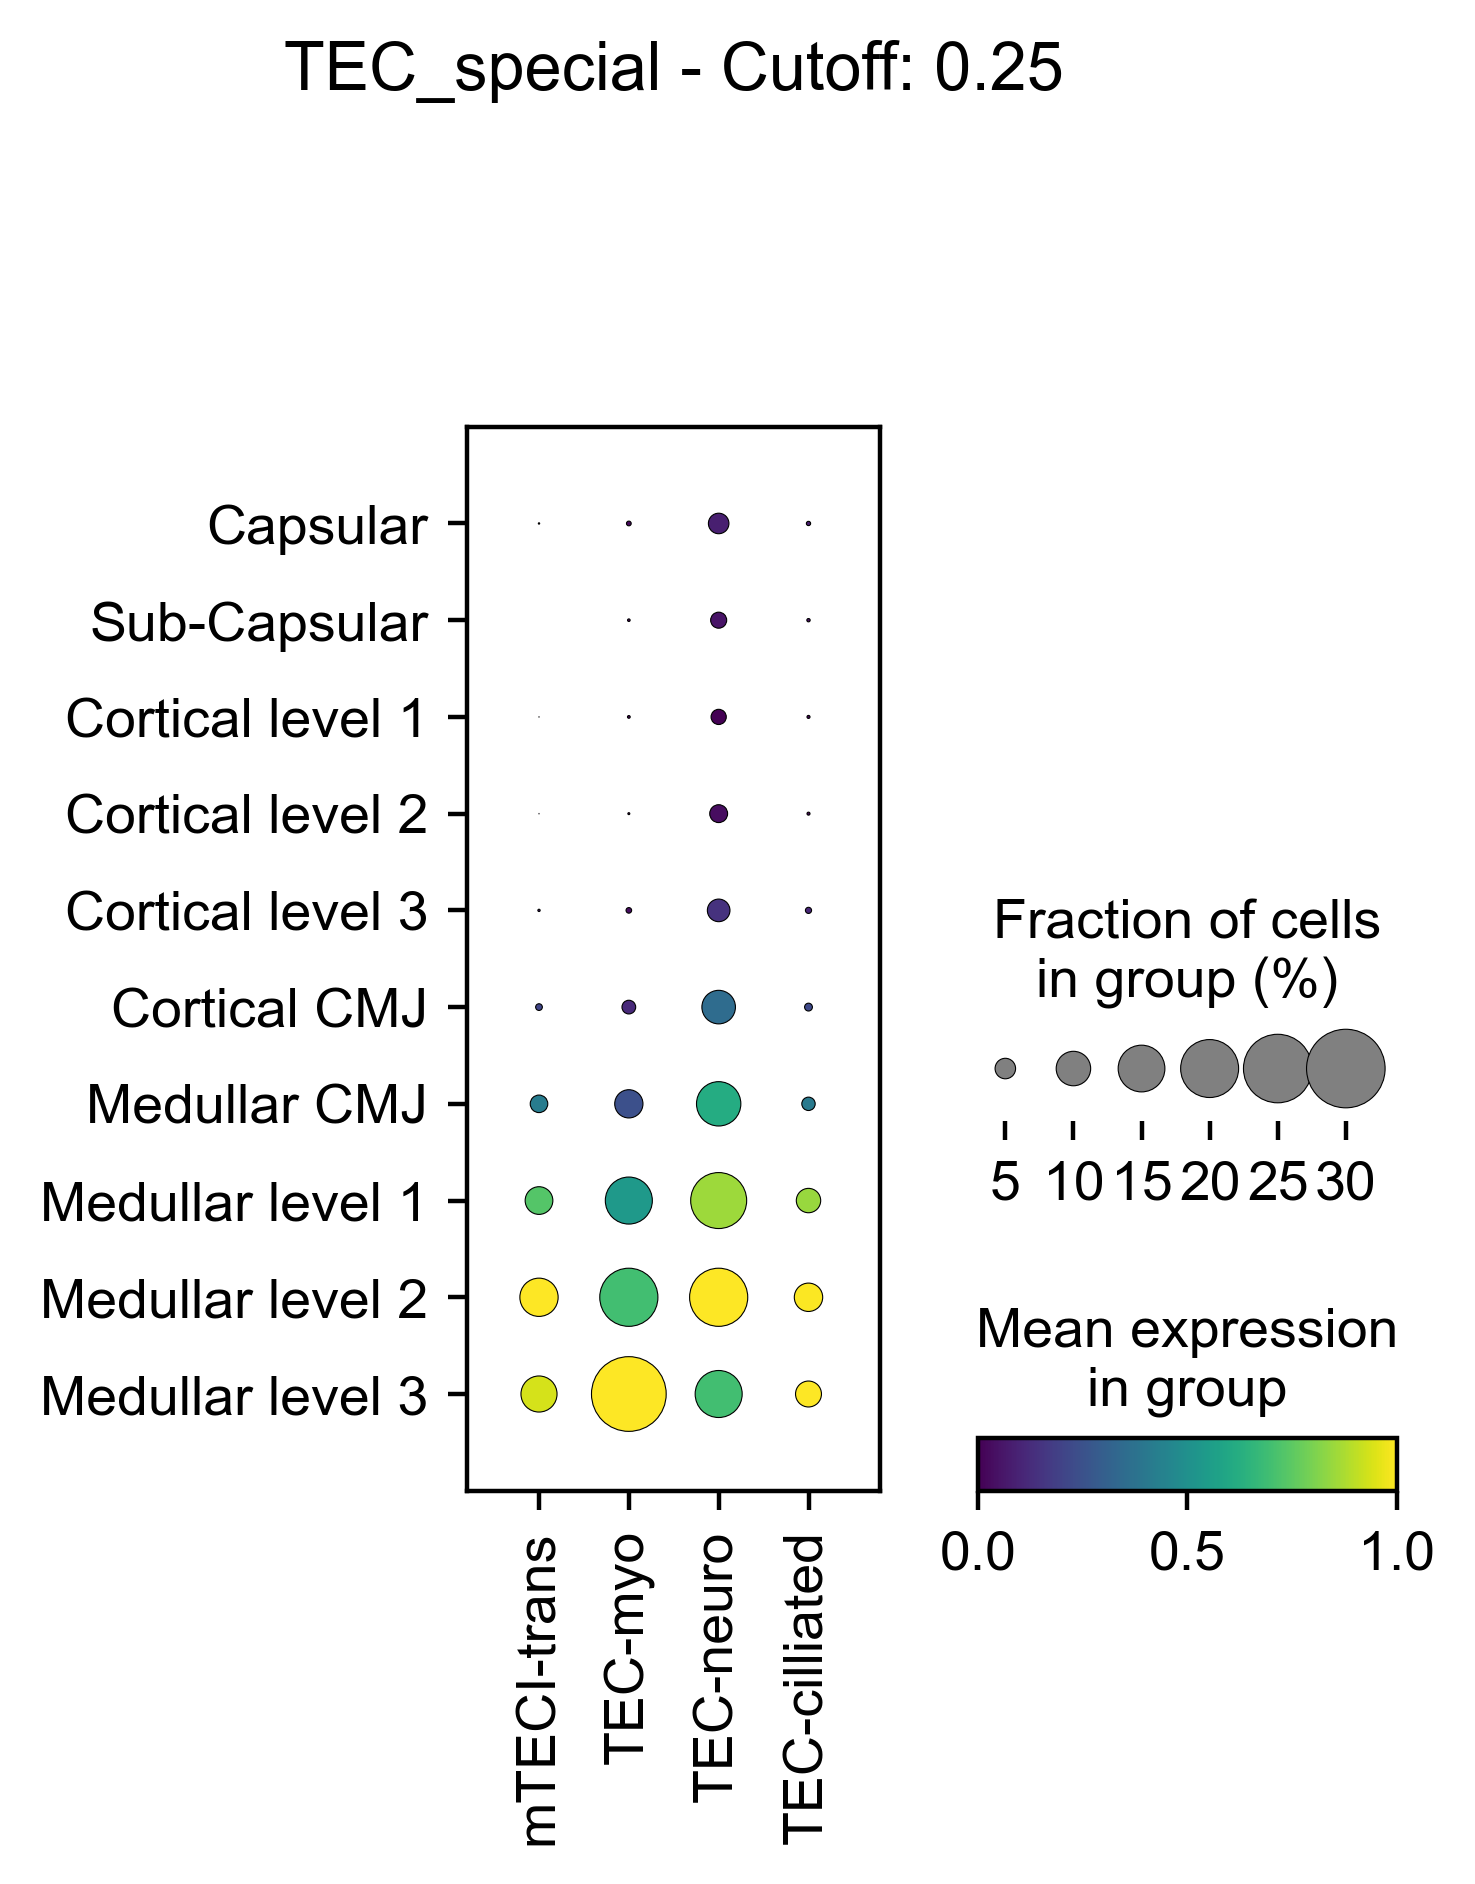

In [39]:
# subset cells extended TEC figure 
os.chdir('')

subset_keys = ['TEC_special']
cutoff = {'TEC_special':0.25}
cells_subset = {k: cells[k] for k in subset_keys}
 
sc.set_figure_params(figsize=[7, 7], fontsize=12, dpi=200)

for cell, cell_types in cells_subset.items():
    print(cell)
    print(cell_types)
    save_path = f'paed_{cell}_cutoff_{cutoff[cell]}.pdf'  # Construct the file name
    dp = sc.pl.dotplot(cellab_paed, var_names=cell_types,
              groupby='manual_bin_cma_v2', cmap='viridis',title=f'{cell} - Cutoff: {cutoff[cell]}',
                      expression_cutoff=cutoff[cell], standard_scale='var', return_fig = True) #save=save_path)
    export_Source_dotplot(Dotplot_obj = dp, path = source_folder, name = f"{cell}_{cutoff[cell]}_paed_Visdotplot_source_data")
    dp.show()

# plot TECs figure 4 

TEC_fig4
['cTECIII', 'cTECII', 'cTECI', 'mcTEC', 'mTECI', 'mTECII', 'mTECIII']
/nfs/team205/ny1/ThymusSpatialAtlas/SourceData/TEC_fig4_0.5_paed_Visdotplot_source_data.xlsx has been written


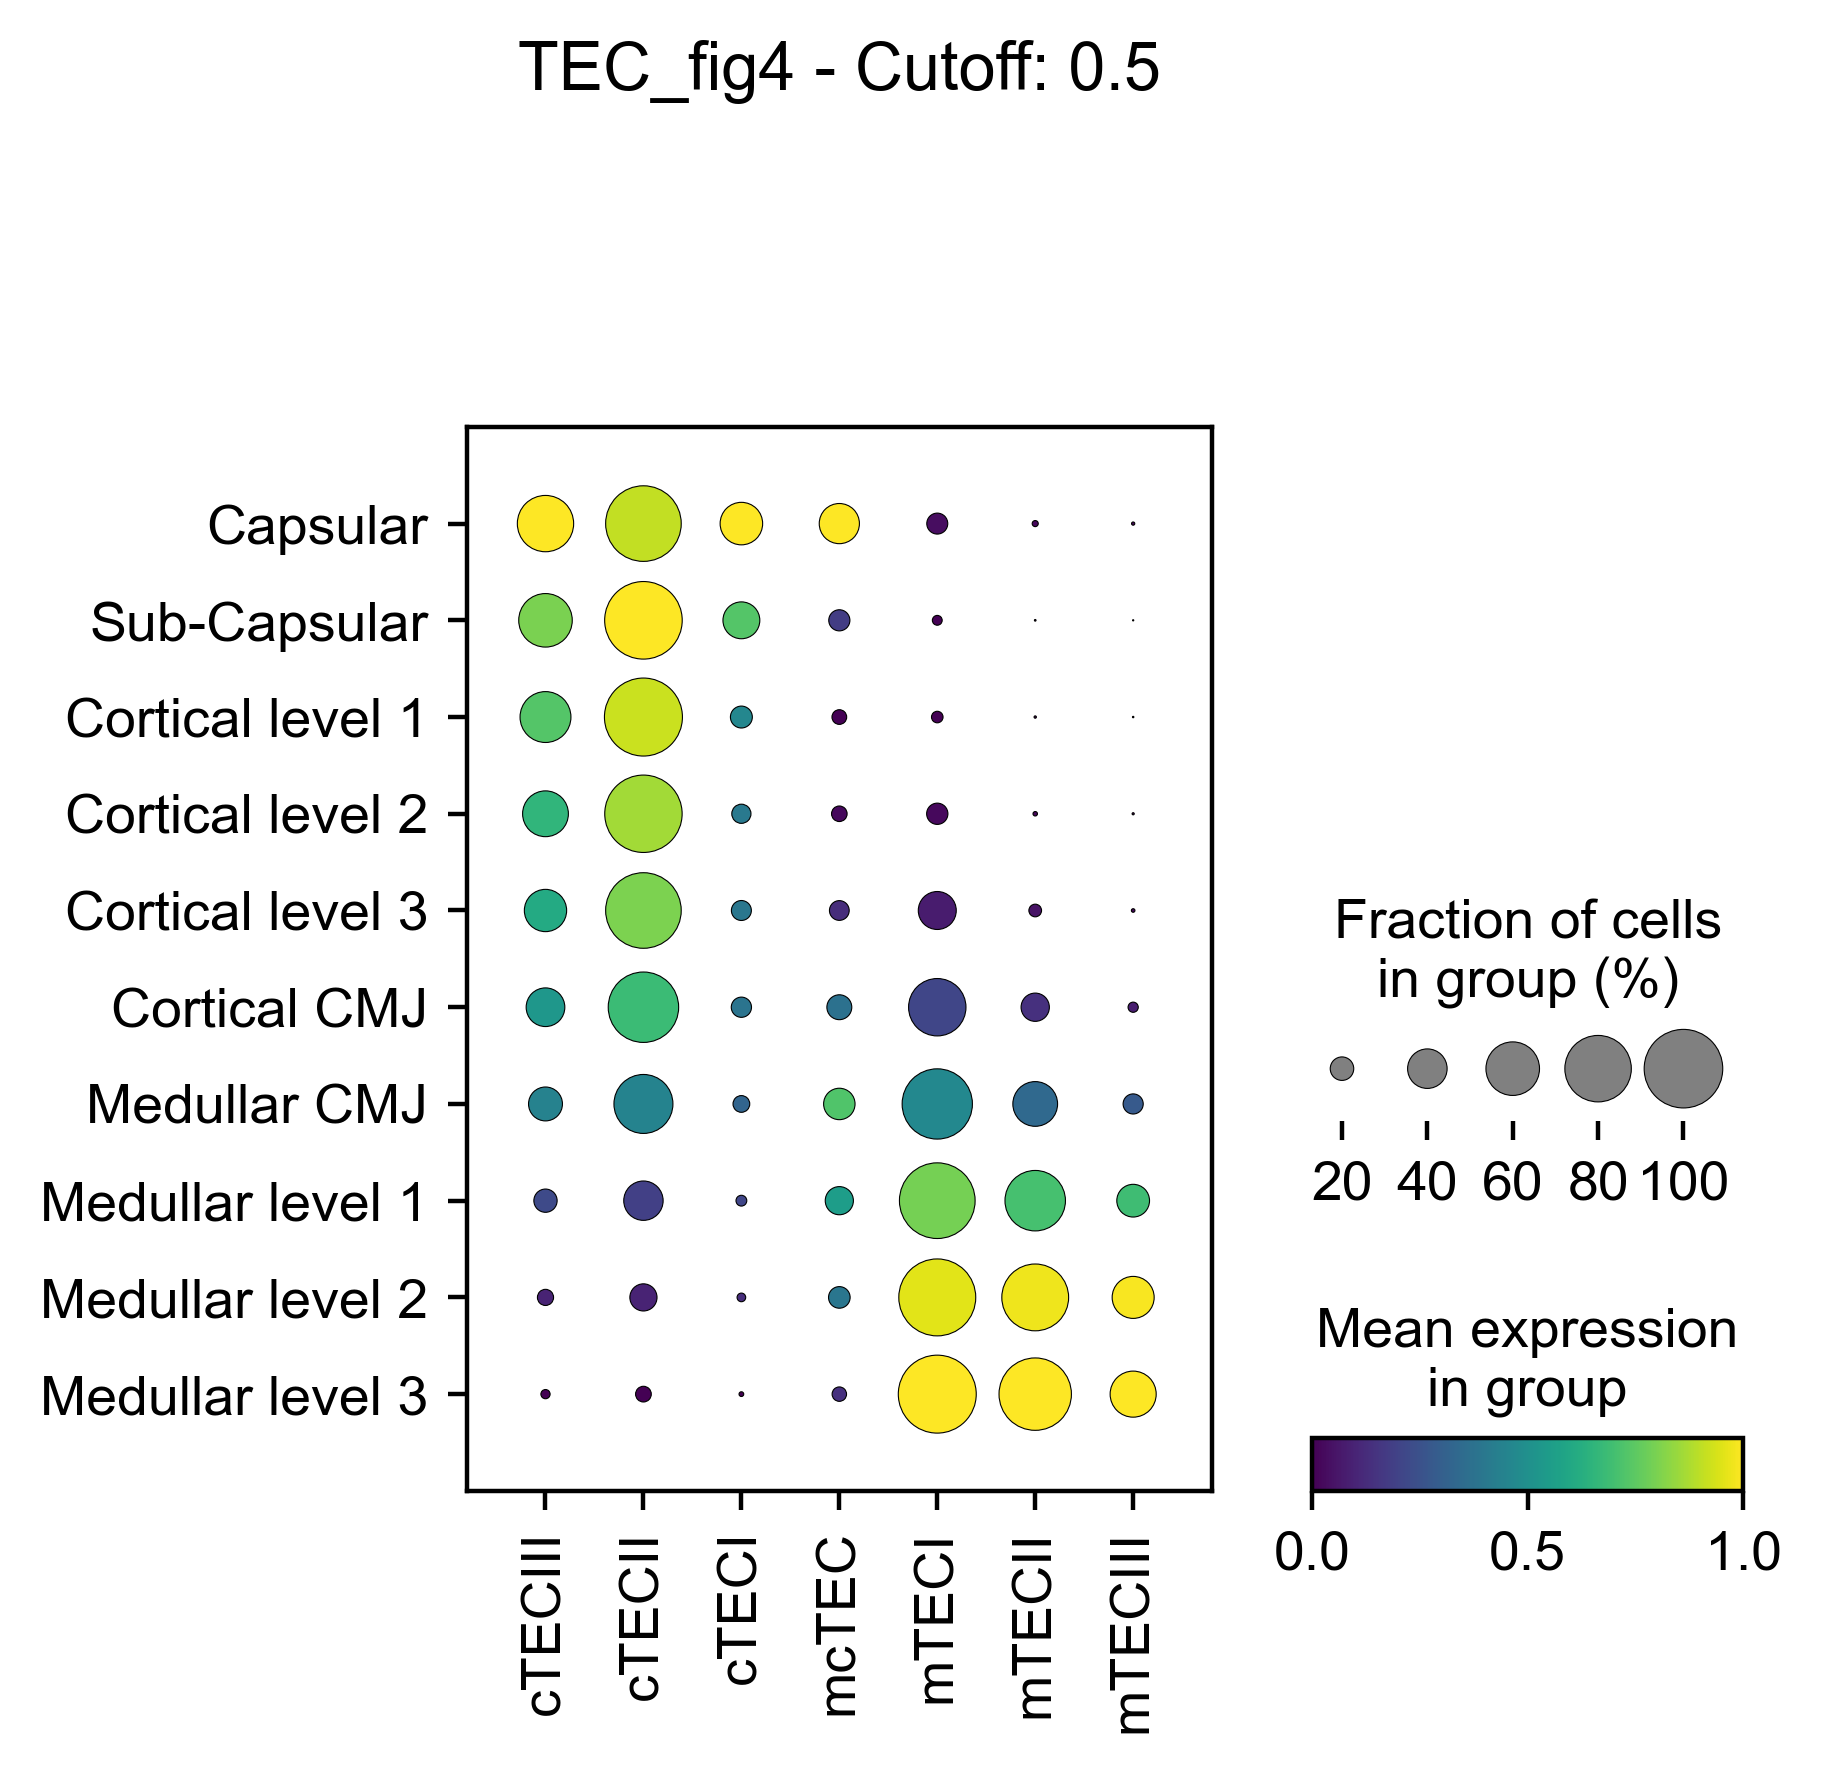

In [37]:
# subset cells
os.chdir('')

subset_keys = ['TEC_fig4']
cells_subset = {k: cells[k] for k in subset_keys}
cutoff = {'TEC_fig4':0.5}

sc.set_figure_params(figsize=[7, 7], fontsize=12, dpi=200)

for cell, cell_types in cells_subset.items():
    print(cell)
    print(cell_types)
    save_path = f'paed_{cell}_cutoff_{cutoff[cell]}_v2.pdf'  # Construct the file name
    dp = sc.pl.dotplot(cellab_paed, var_names=cell_types,
                  groupby='manual_bin_cma_v2', cmap='viridis',title=f'{cell} - Cutoff: {cutoff[cell]}',
                  expression_cutoff=cutoff[cell], standard_scale='var', return_fig = True) # save=save_path)
    export_Source_dotplot(Dotplot_obj = dp, path = source_folder, name = f"{cell}_{cutoff[cell]}_paed_Visdotplot_source_data")
#         dp.show()
    sc.pl.dotplot(cellab_paed, var_names=cell_types,
                  groupby='manual_bin_cma_v2', cmap='viridis',title=f'{cell} - Cutoff: {cutoff[cell]}',
                  expression_cutoff=cutoff[cell], standard_scale='var', save=save_path)

TEC_fig4
['cTECIII', 'cTECII', 'cTECI', 'mcTEC', 'mTECI', 'mTECII', 'mTECIII']
/nfs/team205/ny1/ThymusSpatialAtlas/SourceData/TEC_fig4_0.25_paed_Visdotplot_source_data.xlsx has been written


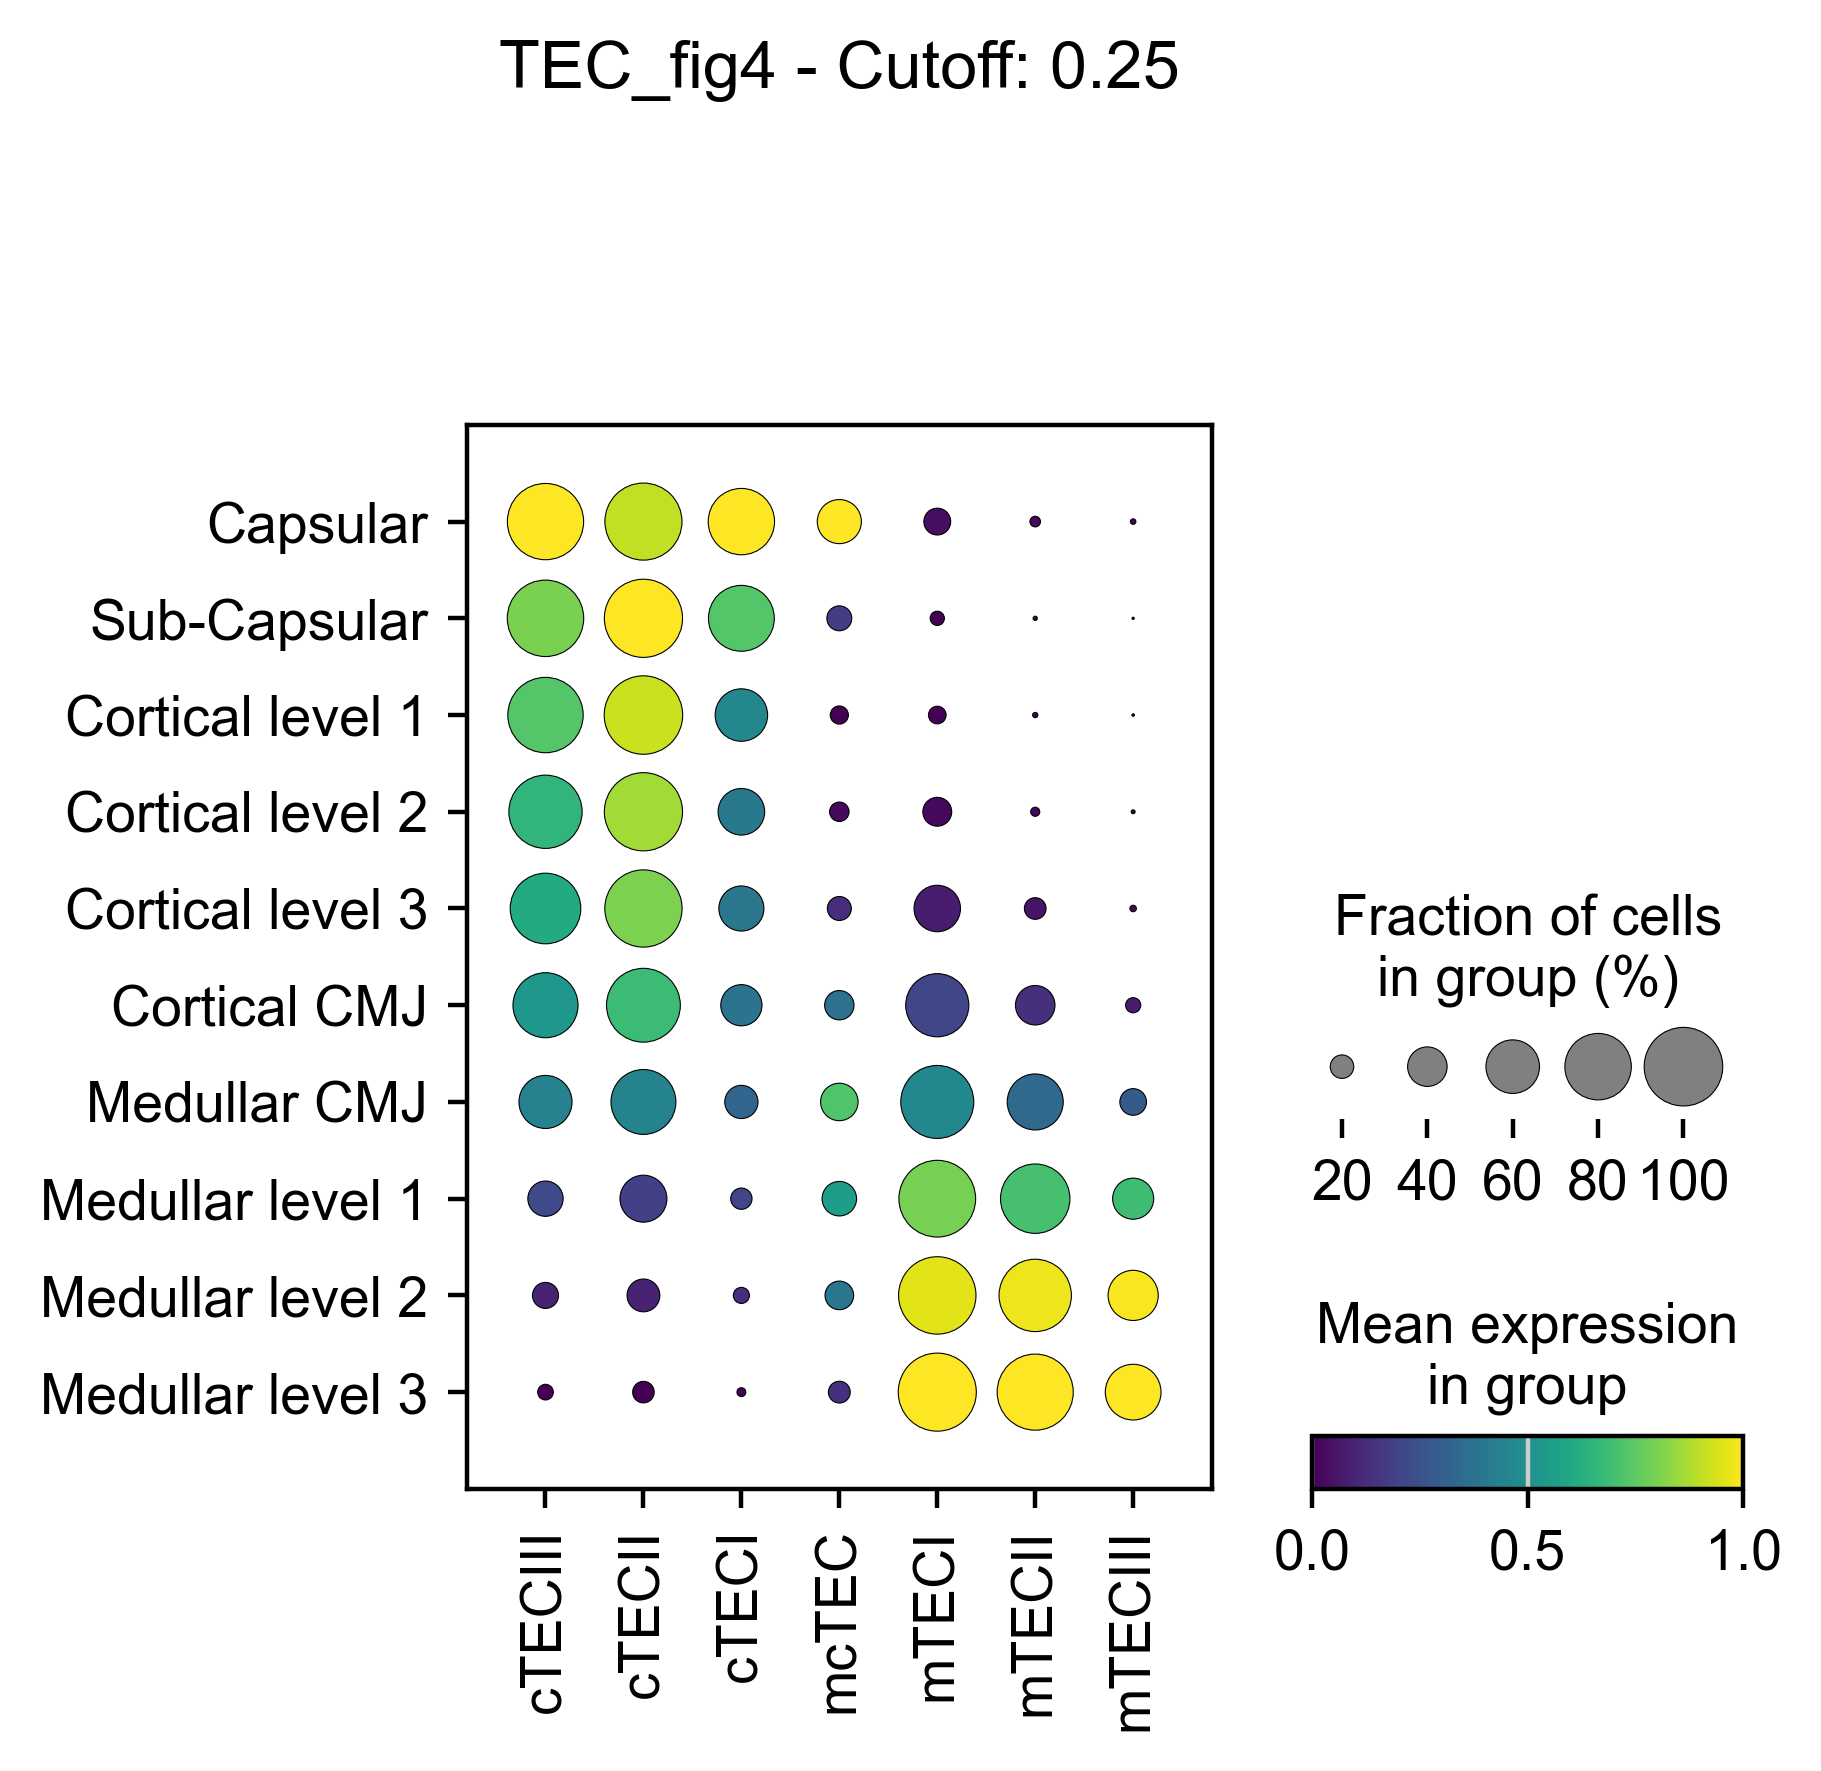

In [24]:
# subset cells
os.chdir('')

subset_keys = ['TEC_fig4']
cells_subset = {k: cells[k] for k in subset_keys}
 
sc.set_figure_params(figsize=[7, 7], fontsize=12, dpi=200)

for cell, cell_types in cells_subset.items():
    print(cell)
    print(cell_types)
    for cutoff in [0.25]:
        save_path = f'paed_{cell}_cutoff_{cutoff}.pdf'  # Construct the file name
        dp = sc.pl.dotplot(cellab_paed, var_names=cell_types,
                      groupby='manual_bin_cma_v2', cmap='viridis',title=f'{cell} - Cutoff: {cutoff}',
                      expression_cutoff=cutoff, standard_scale='var', return_fig = True) # save=save_path)
        export_Source_dotplot(Dotplot_obj = dp, path = source_folder, name = f"{cell}_{cutoff}_paed_Visdotplot_source_data")
        dp.show()


 # Extended figure TEC 

TEC_fig4
['cTECIII', 'cTECII', 'cTECI', 'mcTEC', 'mTECI', 'mTECII', 'mTECIII']
/nfs/team205/ny1/ThymusSpatialAtlas/SourceData/TEC_fig4extended_{'TEC_fig4': 0.5}_paed_Visdotplot_source_data.xlsx has been written


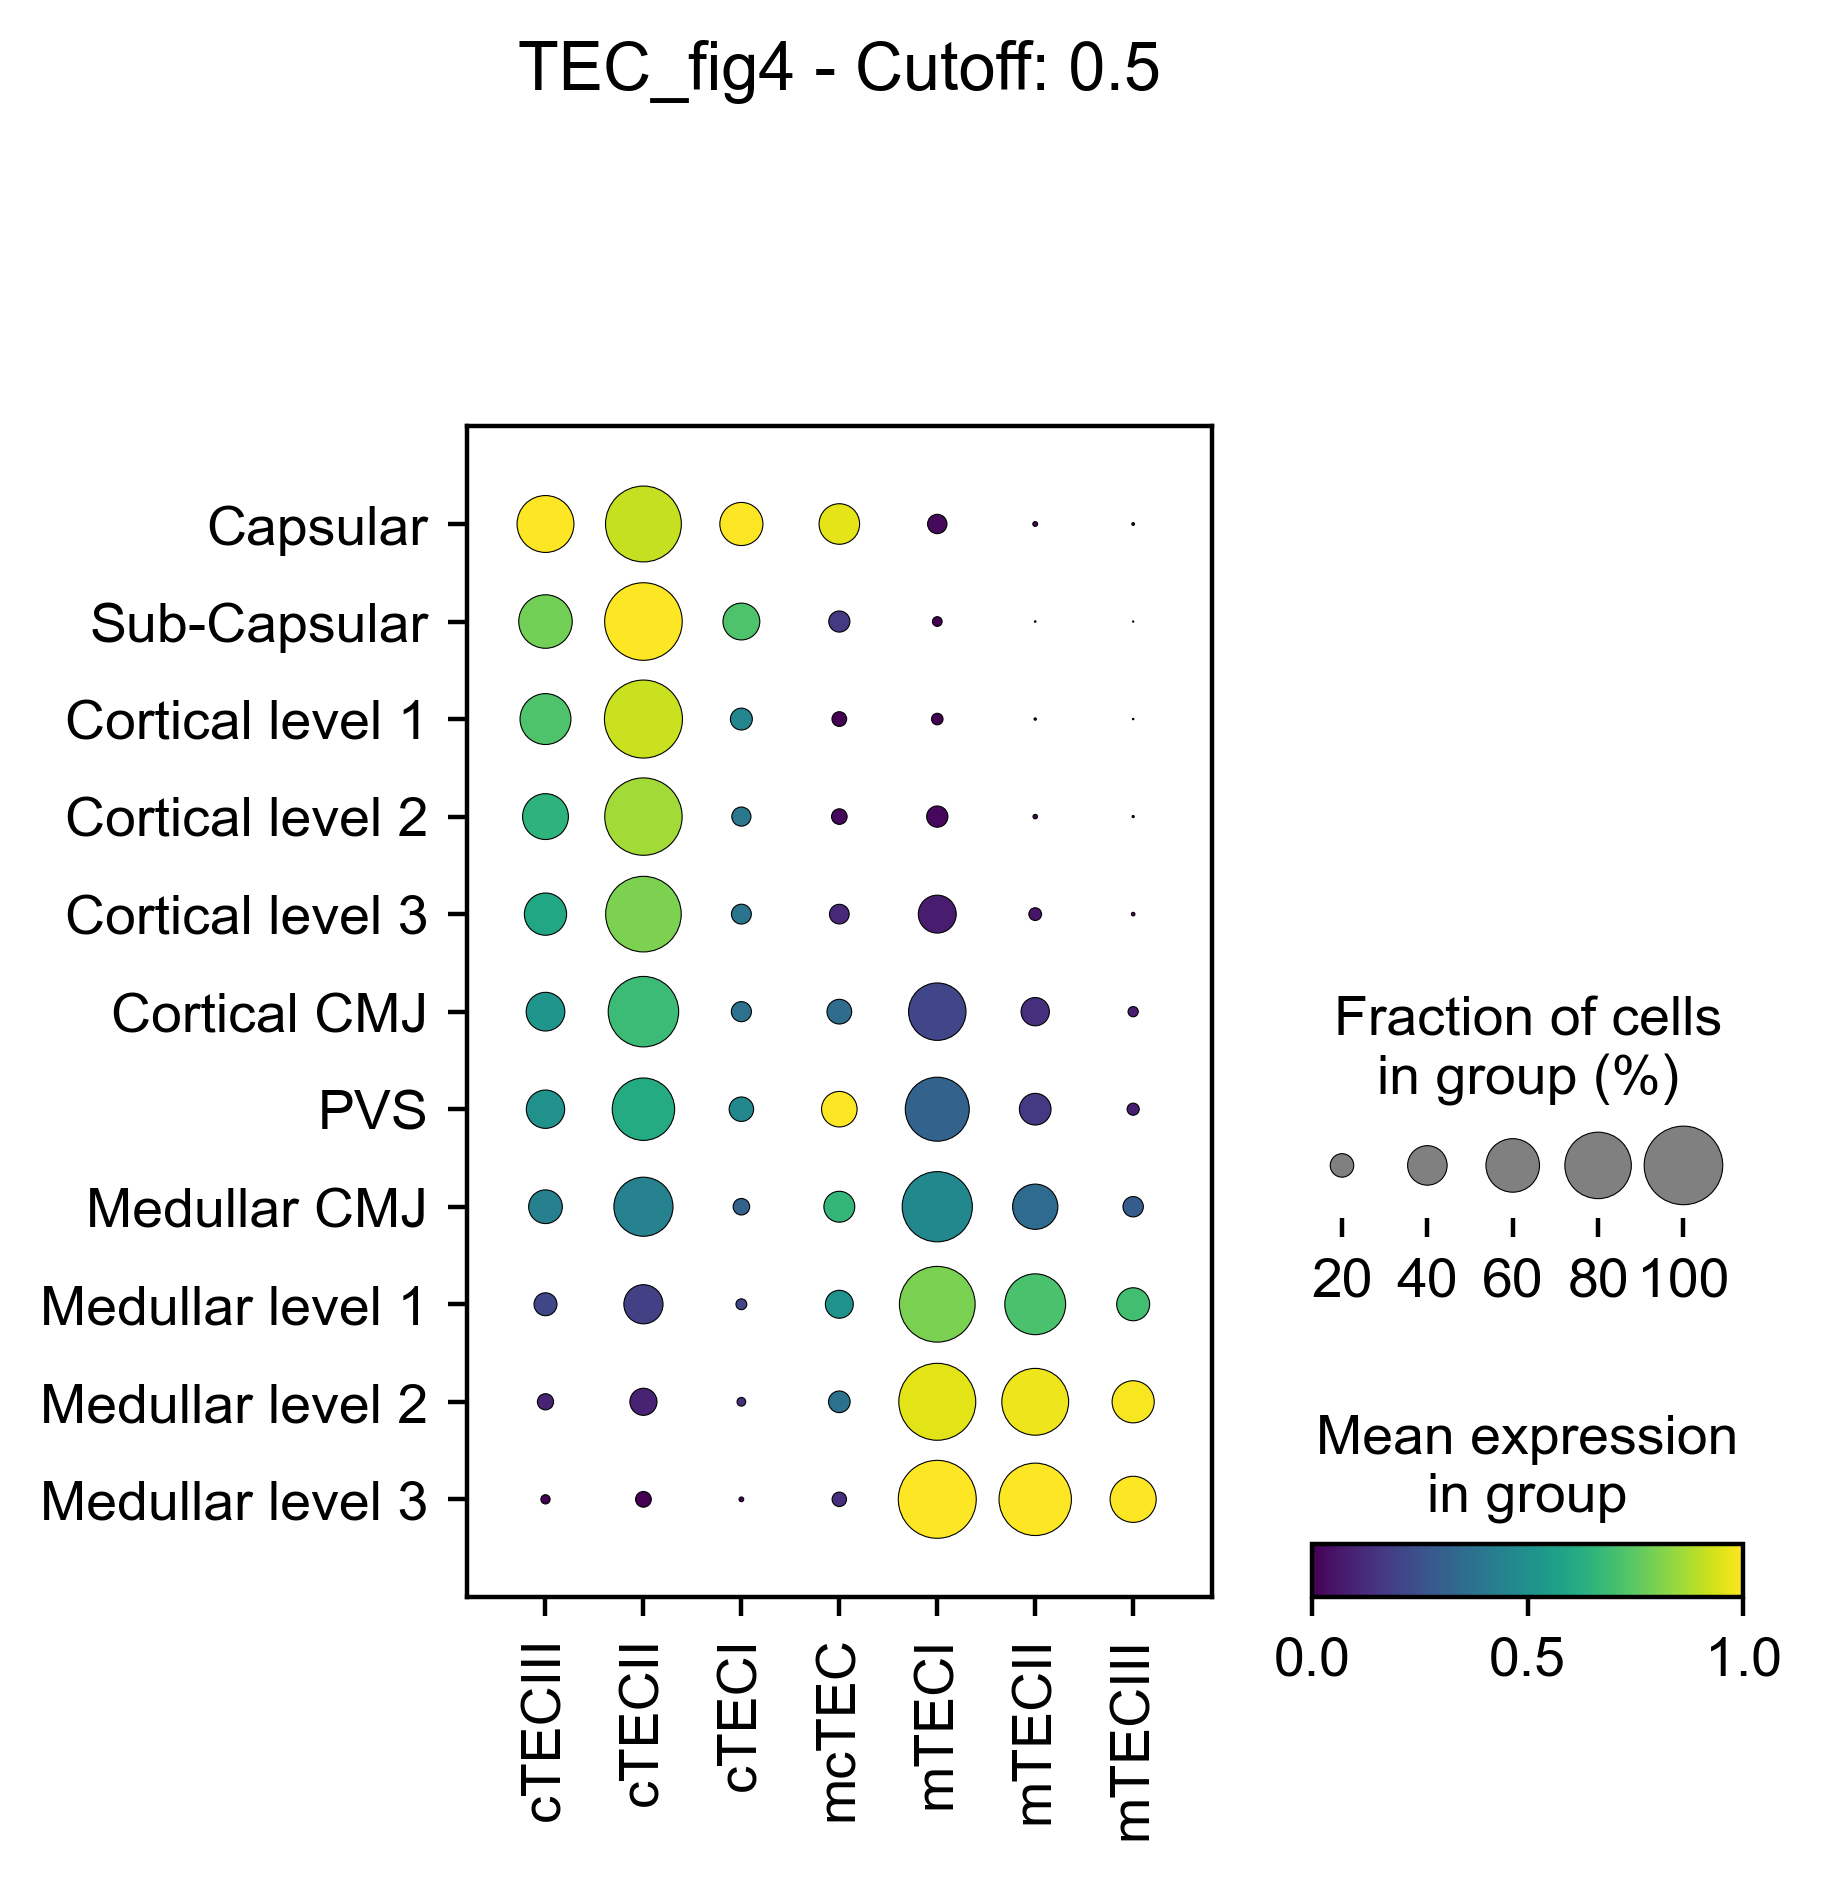

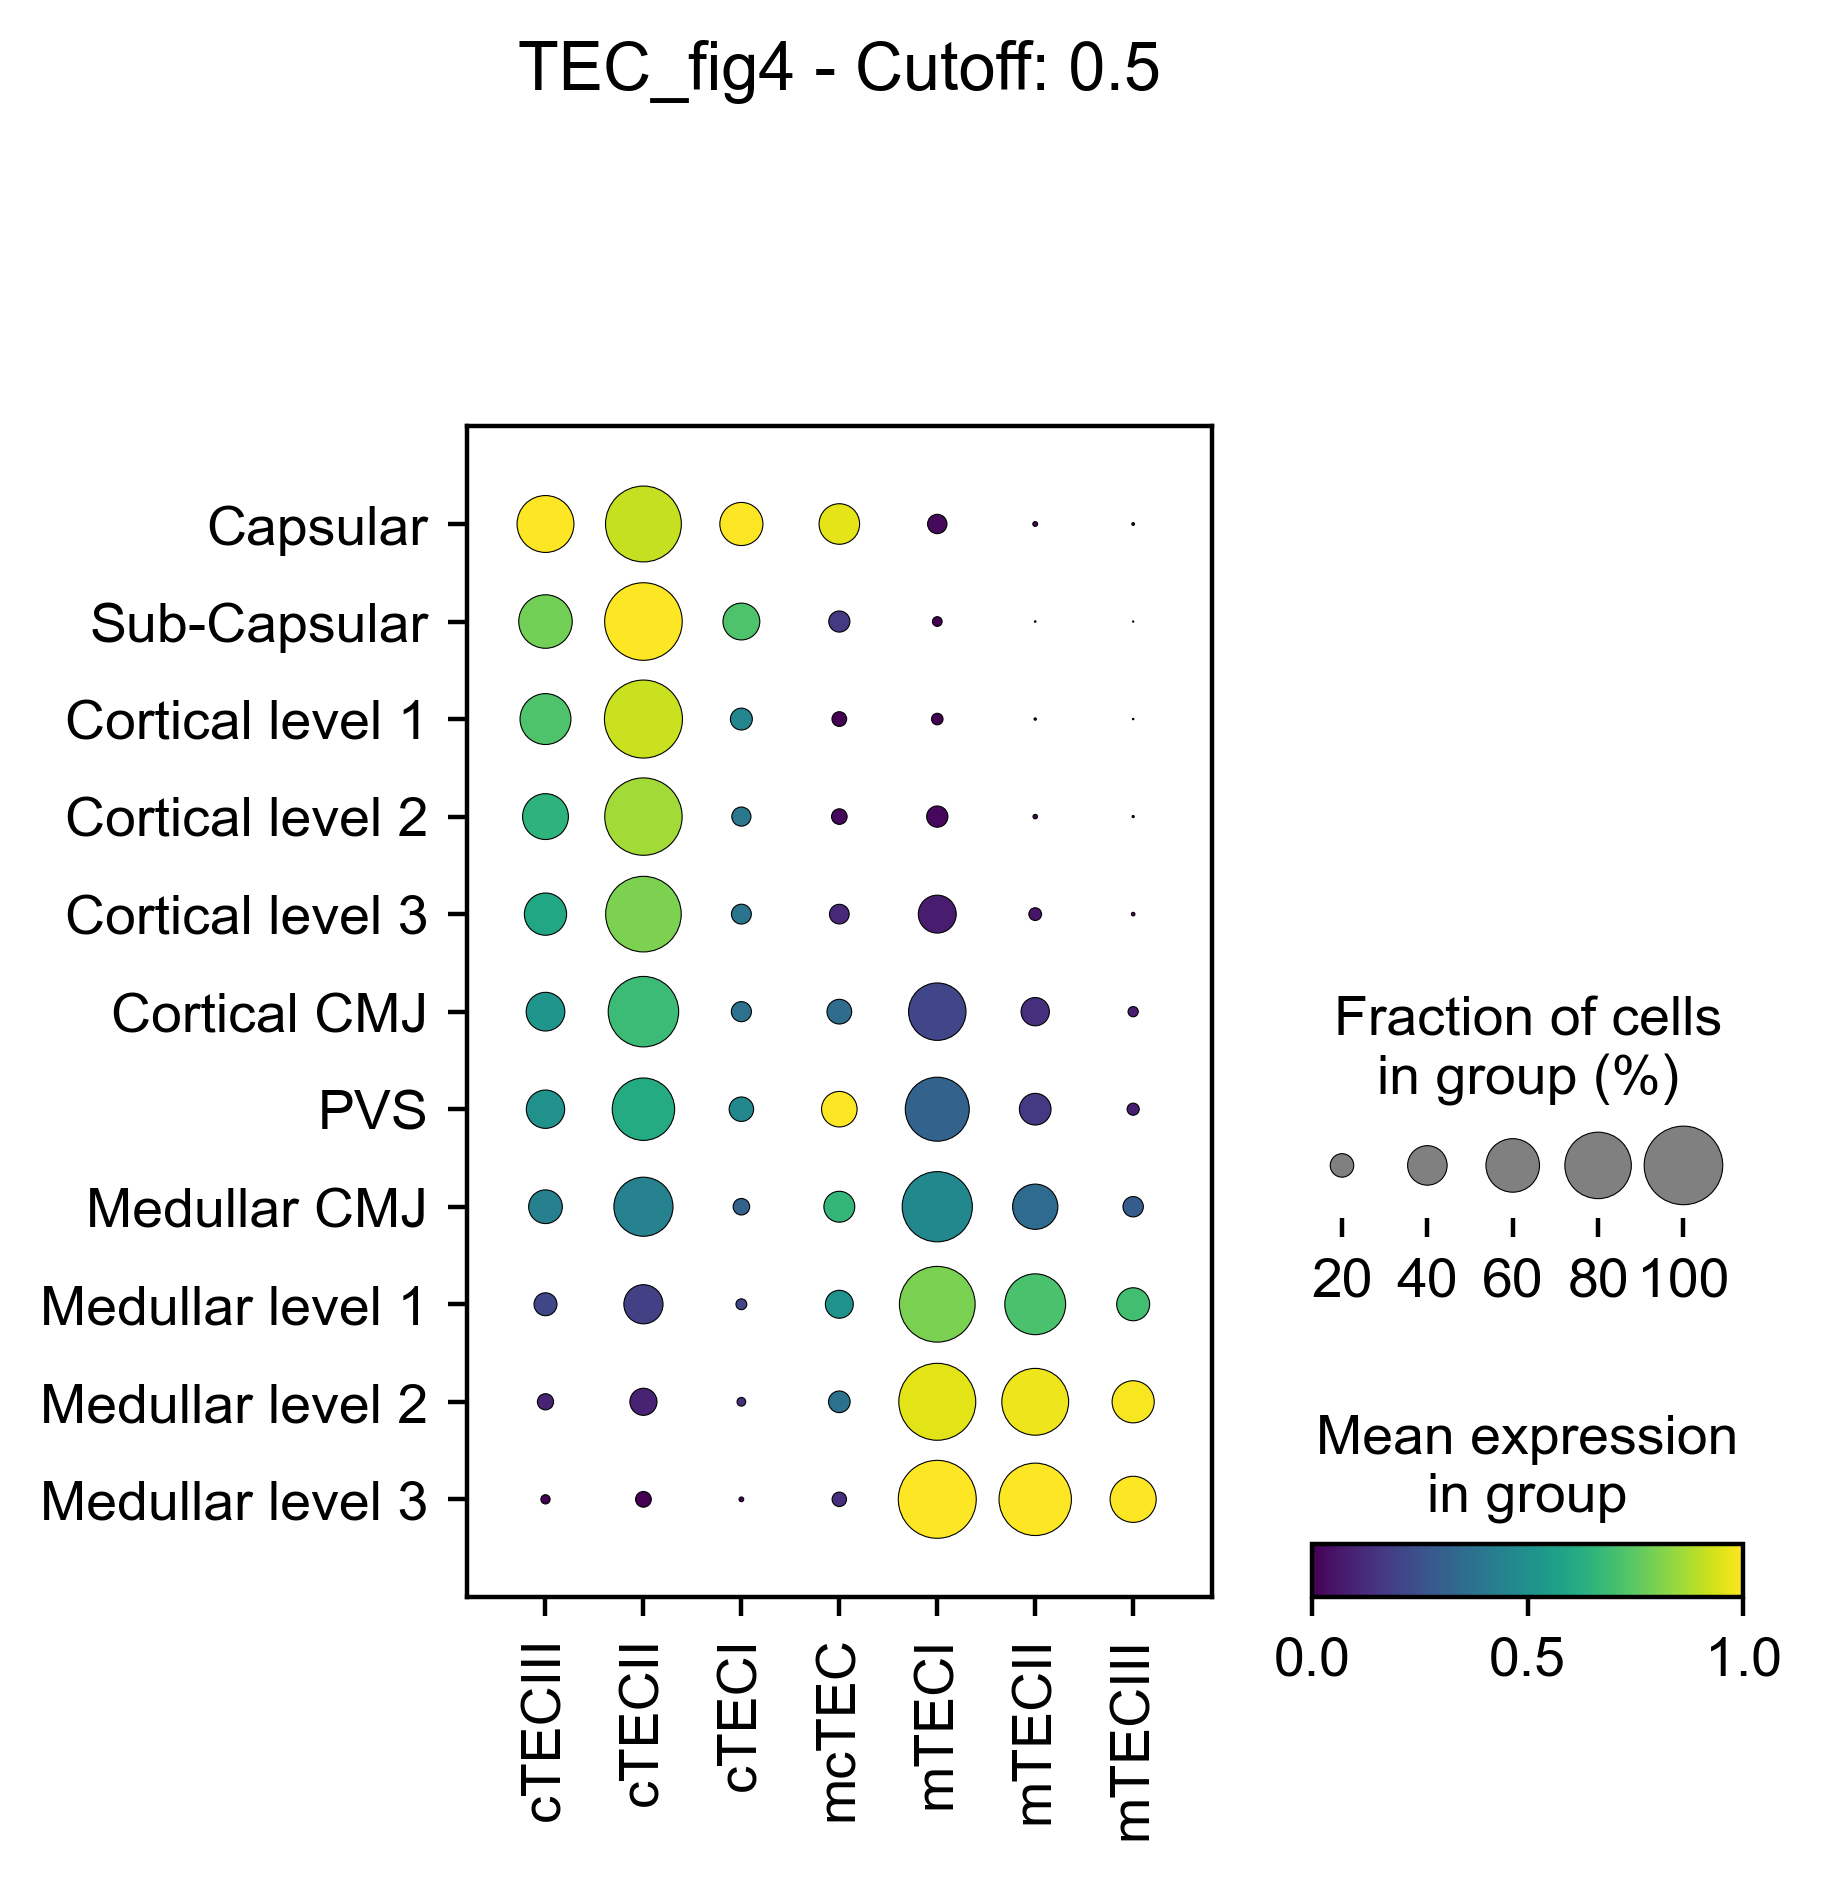

In [40]:
os.chdir('')
cellab_paed.obs['manual_bin_cma_v2'] = cellab_paed.obs['manual_bin_cma_v2'].astype('string')
cellab_paed.obs.loc[cellab_paed.obs['annotations_level_1']=='PVS','manual_bin_cma_v2'] = 'PVS'
cellab_paed.obs['manual_bin_cma_v2'] = cellab_paed.obs['manual_bin_cma_v2'].astype('category')

ct_order = ['Capsular','Sub-Capsular','Cortical level 1','Cortical level 2','Cortical level 3','Cortical CMJ','PVS','Medullar CMJ','Medullar level 1','Medullar level 2','Medullar level 3']
cellab_paed.obs['manual_bin_cma_v2'] = cellab_paed.obs['manual_bin_cma_v2'].cat.reorder_categories(ct_order)
subset_keys = ['TEC_fig4']
cells_subset = {k: cells[k] for k in subset_keys}
cutoff = {'TEC_fig4':0.5}
 
sc.set_figure_params(figsize=[7, 7], fontsize=12, dpi=200)

for cell, cell_types in cells_subset.items():
    print(cell)
    print(cell_types)
    save_path = f'paed_PVS_{cell}_cutoff_{cutoff[cell]}_v2.pdf'  # Construct the file name
    dp = sc.pl.dotplot(cellab_paed, var_names=cell_types,
                  groupby='manual_bin_cma_v2', cmap='viridis',title=f'{cell} - Cutoff: {cutoff[cell]}',
                  expression_cutoff=cutoff[cell], standard_scale='var', return_fig = True) #save=save_path)
    export_Source_dotplot(Dotplot_obj = dp, path = source_folder, name = f"{cell}extended_{cutoff}_paed_Visdotplot_source_data")
    dp.show()
    sc.pl.dotplot(cellab_paed, var_names=cell_types,
                  groupby='manual_bin_cma_v2', cmap='viridis',title=f'{cell} - Cutoff: {cutoff[cell]}',
                  expression_cutoff=cutoff[cell], standard_scale='var', save=save_path)

TEC_fig4
['cTECIII', 'cTECII', 'cTECI', 'mcTEC', 'mTECI', 'mTECII', 'mTECIII']
/nfs/team205/ny1/ThymusSpatialAtlas/SourceData/TEC_fig4extended_0.25_paed_Visdotplot_source_data.xlsx has been written


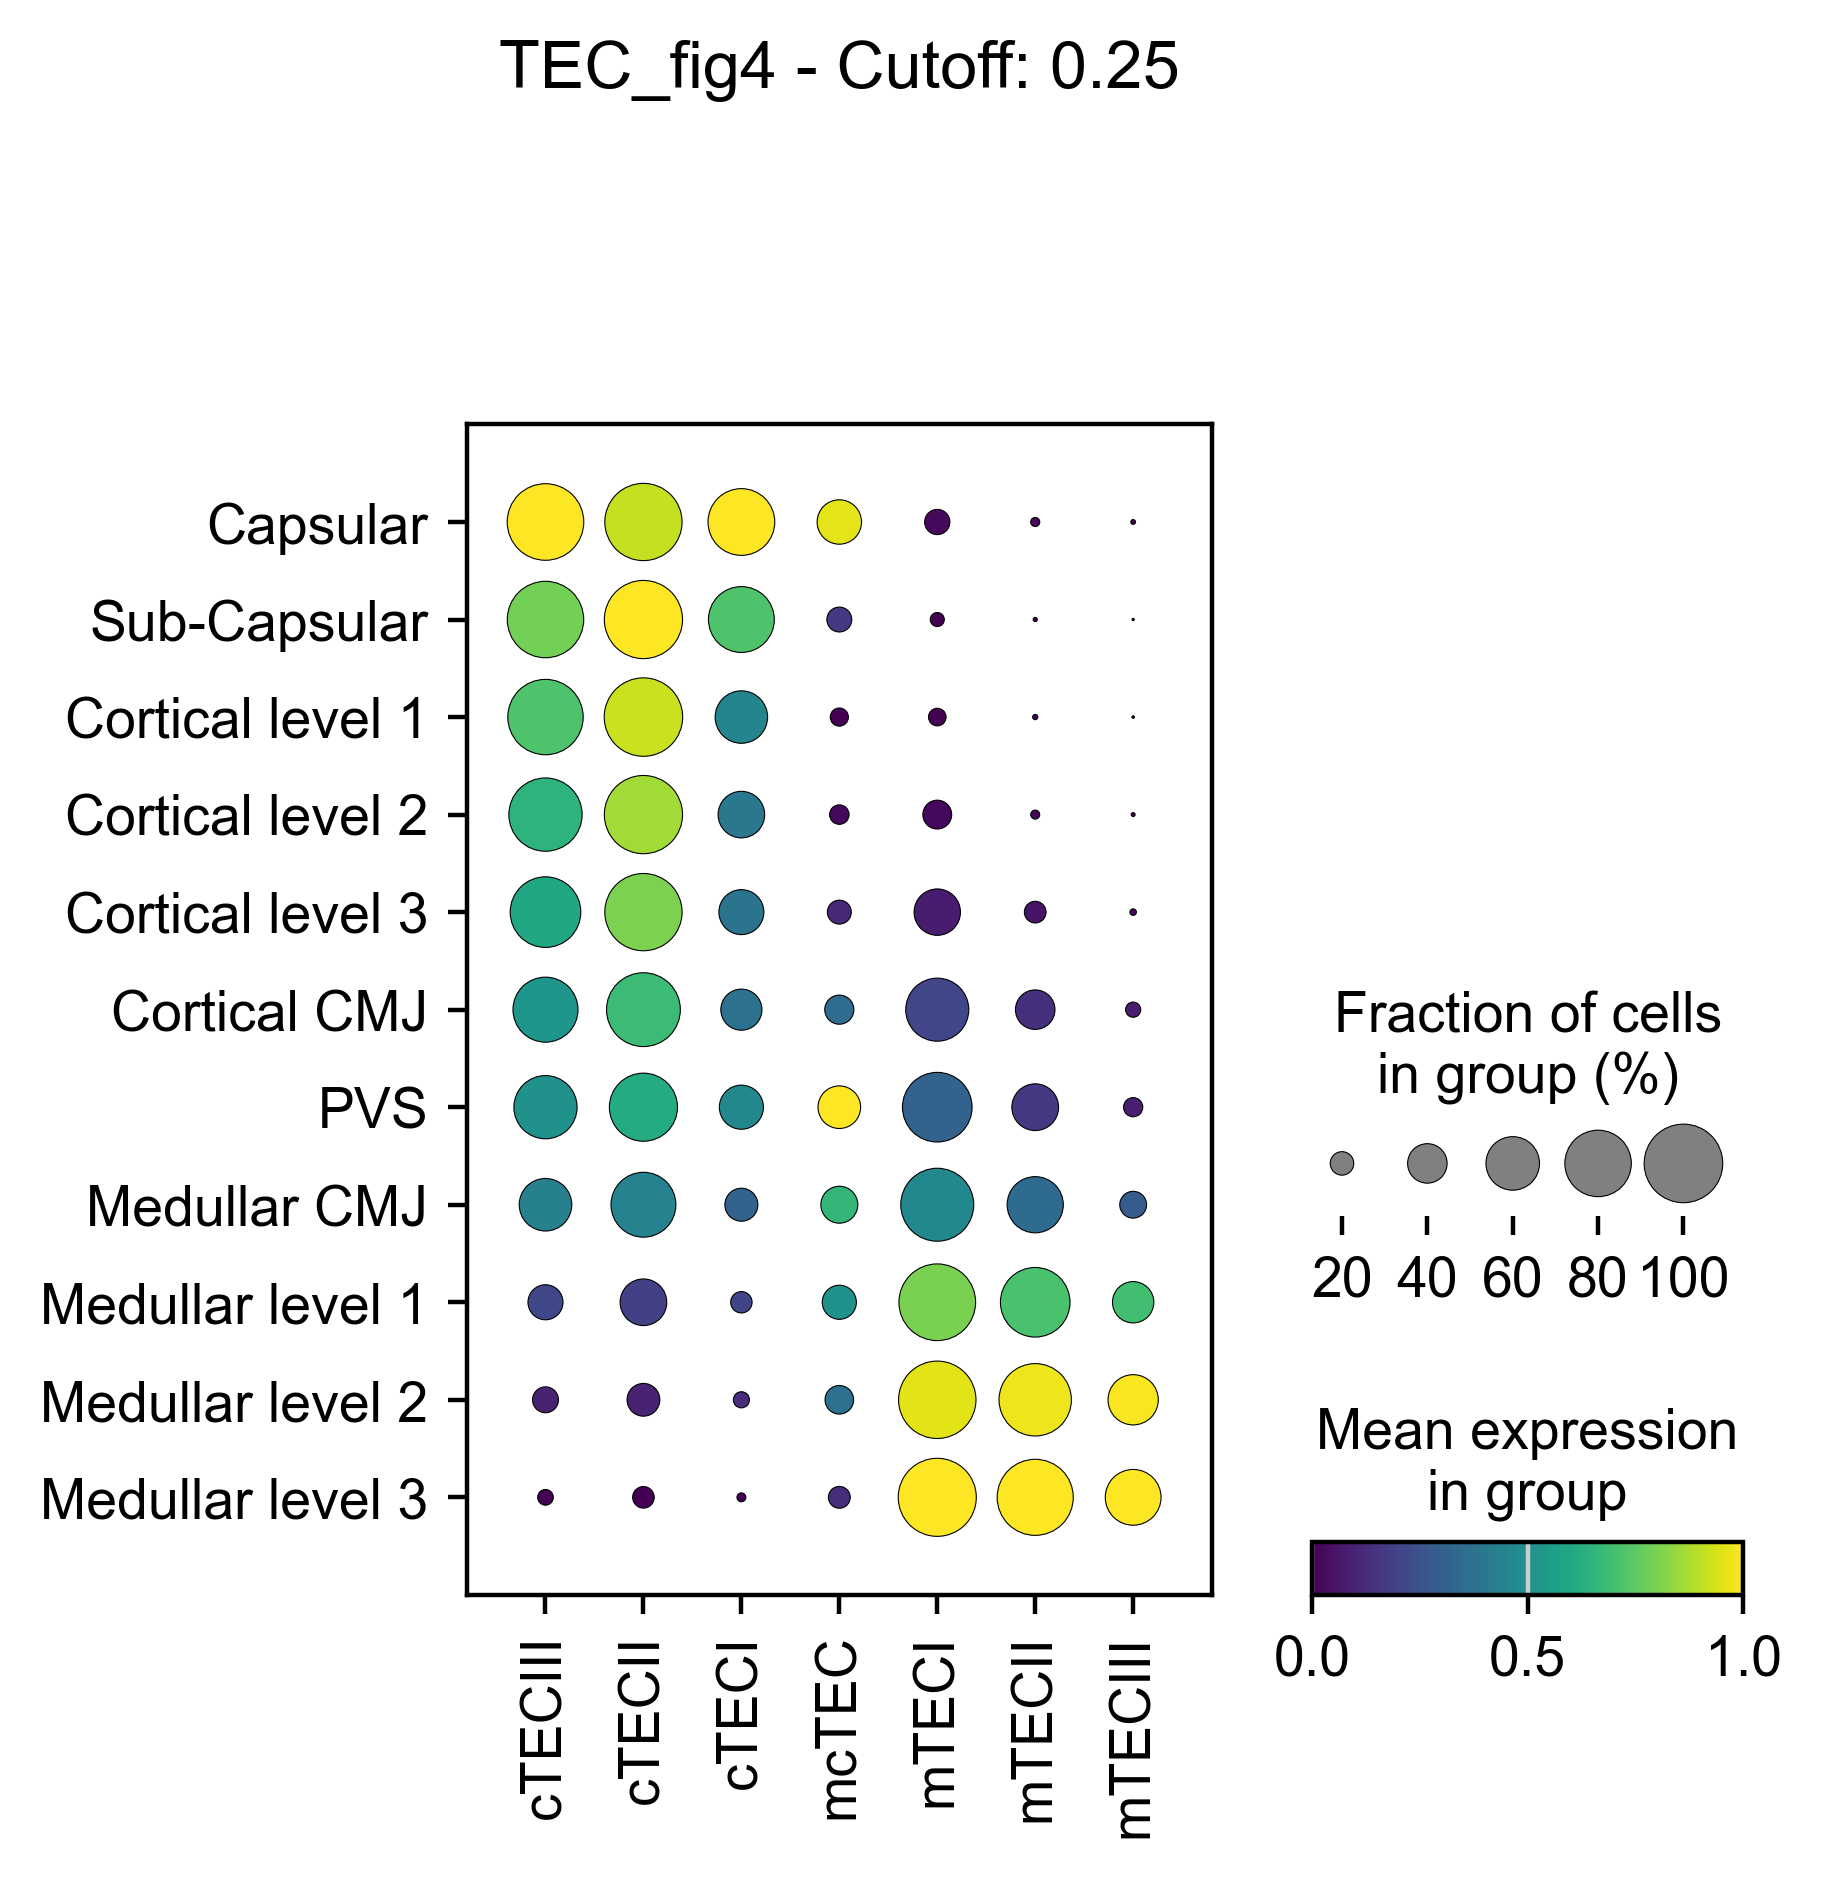

In [24]:
os.chdir('')
cellab_paed.obs['manual_bin_cma_v2'] = cellab_paed.obs['manual_bin_cma_v2'].astype('string')
cellab_paed.obs.loc[cellab_paed.obs['annotations_level_1']=='PVS','manual_bin_cma_v2'] = 'PVS'
cellab_paed.obs['manual_bin_cma_v2'] = cellab_paed.obs['manual_bin_cma_v2'].astype('category')

ct_order = ['Capsular','Sub-Capsular','Cortical level 1','Cortical level 2','Cortical level 3','Cortical CMJ','PVS','Medullar CMJ','Medullar level 1','Medullar level 2','Medullar level 3']
cellab_paed.obs['manual_bin_cma_v2'] = cellab_paed.obs['manual_bin_cma_v2'].cat.reorder_categories(ct_order)
subset_keys = ['TEC_fig4']
cells_subset = {k: cells[k] for k in subset_keys}
 
sc.set_figure_params(figsize=[7, 7], fontsize=12, dpi=200)

for cell, cell_types in cells_subset.items():
    print(cell)
    print(cell_types)
    for cutoff in [0.25]:
        save_path = f'paed_PVS_{cell}_cutoff_{cutoff}.pdf'  # Construct the file name
        dp = sc.pl.dotplot(cellab_paed, var_names=cell_types,
                      groupby='manual_bin_cma_v2', cmap='viridis',title=f'{cell} - Cutoff: {cutoff}',
                      expression_cutoff=cutoff, standard_scale='var', return_fig = True) #save=save_path)
        export_Source_dotplot(Dotplot_obj = dp, path = source_folder, name = f"{cell}extended_{cutoff}_paed_Visdotplot_source_data")
        dp.show()
